# Employee Performance Analysis - INX Future Inc.

## Project Type: MultiClass Classification
## Contribution: Aarti salunkhe

# Business Case

- INX Future Inc., a leading data analytics and automation company, has experienced a decline in employee performance. Client satisfaction levels have dropped by 8 percentage points, and service escalations have increased. The management is concerned about taking direct action against low-performing employees, as it could negatively impact overall morale and the company’s reputation as a top employer.

To address this issue, the CEO, Mr. Brain, has initiated a data science project to analyze employee performance data. The goal is to uncover key factors influencing performance, identify non-performing employees accurately, and build a predictive model to assess employee performance based on relevant factors.

## Solution Approach (Objective)
The main objectives of this project are:
- Analyze department-wise performance to identify areas where employee productivity is lower.
- Identify the top 3 key factors affecting employee performance to help management focus on improvements.
- Develop a machine learning model that predicts employee performance based on different attributes. This model will assist in making informed hiring and retention decisions.
- Provide actionable recommendations to enhance employee performance and overall organizational efficiency.


## Domain Analysis (Understanding the Business Context)
### Industry:
- The company operates in the data analytics and automation sector, which is highly competitive.
- Employee performance directly affects service quality, client satisfaction, and business growth.
### Challenges:
- Employee performance has declined, leading to increased service escalations.
- Direct penalization may lower employee morale and impact the company's reputation.
- High-performing employees are crucial for maintaining INX's top employer status.
### Why Data Science?
- Employee data contains multiple factors such as work experience, job role, satisfaction levels, training, promotions, work-life balance, etc.
- Analyzing these factors using data science techniques will help in making data-driven decisions rather than relying on assumptions.
- A predictive model will help forecast employee performance and improve hiring decisions.

In [6]:
#load all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from ydata_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE


In [7]:
df = pd.read_excel("INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls", engine="xlrd")

# Basic Checks

In [9]:
df.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...                            4   
2                  4  ...                            3   
3                  4  ...                            2   
4                  4  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                       0                     8         No                  3  
1                       1                     7         No                  3  
2                       1                    12         No                  4  
3                      12                     6         No                  3  
4                       2                     2         No                  3  

[5 rows x 28 columns]

- dataset contains 1,200 employees with 28 columns

In [11]:
df.tail()

EmpNumber  Age  Gender EducationBackground MaritalStatus EmpDepartment  \
1195   E100992   27  Female             Medical      Divorced         Sales   
1196   E100993   37    Male       Life Sciences        Single   Development   
1197   E100994   50    Male             Medical       Married   Development   
1198   E100995   34  Female             Medical        Single  Data Science   
1199   E100998   24  Female       Life Sciences        Single         Sales   

            EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
1195   Sales Executive       Travel_Frequently                 3   
1196  Senior Developer           Travel_Rarely                10   
1197  Senior Developer           Travel_Rarely                28   
1198    Data Scientist           Travel_Rarely                 9   
1199   Sales Executive           Travel_Rarely                 3   

      EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
1195                  1  ...                            2   
1196                  2  ...                            1   
1197                  1  ...                            3   
1198                  3  ...                            2   
1199                  2  ...                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
1195                           6                      3                   3   
1196                           4                      2                   3   
1197                          20                      3                   3   
1198                           9                      3                   4   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
1195                             6                             5   
1196                             1                             0   
1197                            20                             8   
1198                             8                             7   
1199                             2                             2   

     YearsSinceLastPromotion  YearsWithCurrManager  Attrition  \
1195                       0                     4         No   
1196                       0                     0         No   
1197                       3                     8         No   
1198                       7                     7         No   
1199                       2                     0        Yes   

      PerformanceRating  
1195                  4  
1196                  3  
1197                  3  
1198                  3  
1199                  2  

[5 rows x 28 columns]

## Check the columns 

In [13]:
df.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

## Feature Analyzing

 Employee Details
- EmpNumber → Unique Employee ID 
- Age → Age of the employee (numeric).
- Gender → Employee's gender (Male/Female).
- EducationBackground → Field of education (e.g., Life Sciences, Medical, Marketing).
- MaritalStatus → Marital status of the employee (Single/Married/Divorced).

 Job Information
- EmpDepartment → Department the employee works in (e.g., Sales, HR, Data Science).
- EmpJobRole → Specific job title (e.g, Sales Executive, Manager, Data Scientist).
- BusinessTravelFrequency → How often the employee travels for work (Rarely/Frequently).
- DistanceFromHome → Distance (in km) between home and office.

 Education & Satisfaction Levels
- EmpEducationLevel → Employee’s education level (1 = Low, 5 = High).
- EmpEnvironmentSatisfaction → How satisfied employees are with their work environment (1 to 4).
- EmpJobSatisfaction → Satisfaction with their job role (1 to 4).
- EmpWorkLifeBalance → Balance between work and personal life (1 = Bad, 4 = Best).
- EmpRelationshipSatisfaction → Employee’s satisfaction with colleagues/managers (1 to 4).

 Salary & Job Performance
- EmpHourlyRate → Employee’s hourly pay rate (numeric).
- EmpLastSalaryHikePercent → Last salary hike percentage.
- EmpJobInvolvement → Employee’s involvement in their job (1 to 4).
- EmpJobLevel → Job level in the company (higher number = senior position).
- PerformanceRating → Employee’s performance score (1 to 5).

  Experience & Training
- NumCompaniesWorked → Total companies the employee has worked for.
- TotalWorkExperienceInYears → Total years of experience in all companies.
- ExperienceYearsAtThisCompany → Years spent in the current company.
- ExperienceYearsInCurrentRole → Years in the current role.
- YearsSinceLastPromotion → Years since the last promotion.
- YearsWithCurrManager → Years spent with the current manager.
- TrainingTimesLastYear → Number of training sessions attended last year.
- OverTime → Whether the employee does overtime (Yes/No).
- Attrition → Whether the employee has left the company (Yes/No).

### The column PerformanceRating is our target (predict employee performance).

##  Checking for info

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

- it contains both numerical and categorical data.
- Our Target column is PerformanceRating.It is an integer (likely a rating scale like 1-5).

## CHECKING SIZE AND SHAPE

In [21]:
print(f" Shape of Data {df.shape}")
print(f" Size of Data {df.size}")

 Shape of Data (1200, 28)
 Size of Data 33600


## Checking null value counts

In [23]:
null_count = sum(df.isnull().any())

print("There are {} NULL values in the dataframe".format(null_count))

There are 0 NULL values in the dataframe


## CHECKING FOR STATISTICAL INFORMATION

In [25]:
df.describe()

Age  DistanceFromHome  EmpEducationLevel  \
count  1200.000000       1200.000000         1200.00000   
mean     36.918333          9.165833            2.89250   
std       9.087289          8.176636            1.04412   
min      18.000000          1.000000            1.00000   
25%      30.000000          2.000000            2.00000   
50%      36.000000          7.000000            3.00000   
75%      43.000000         14.000000            4.00000   
max      60.000000         29.000000            5.00000   

       EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  \
count                 1200.000000    1200.000000        1200.000000   
mean                     2.715833      65.981667           2.731667   
std                      1.090599      20.211302           0.707164   
min                      1.000000      30.000000           1.000000   
25%                      2.000000      48.000000           2.000000   
50%                      3.000000      66.000000           3.000000   
75%                      4.000000      83.000000           3.000000   
max                      4.000000     100.000000           4.000000   

       EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
count  1200.000000         1200.000000         1200.000000   
mean      2.067500            2.732500            2.665000   
std       1.107836            1.100888            2.469384   
min       1.000000            1.000000            0.000000   
25%       1.000000            2.000000            1.000000   
50%       2.000000            3.000000            2.000000   
75%       3.000000            4.000000            4.000000   
max       5.000000            4.000000            9.000000   

       EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
count               1200.000000                  1200.000000   
mean                  15.222500                     2.725000   
std                    3.625918                     1.075642   
min                   11.000000                     1.000000   
25%                   12.000000                     2.000000   
50%                   14.000000                     3.000000   
75%                   18.000000                     4.000000   
max                   25.000000                     4.000000   

       TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
count                 1200.000000            1200.000000         1200.000000   
mean                    11.330000               2.785833            2.744167   
std                      7.797228               1.263446            0.699374   
min                      0.000000               0.000000            1.000000   
25%                      6.000000               2.000000            2.000000   
50%                     10.000000               3.000000            3.000000   
75%                     15.000000               3.000000            3.000000   
max                     40.000000               6.000000            4.000000   

       ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
count                   1200.000000                   1200.000000   
mean                       7.077500                      4.291667   
std                        6.236899                      3.613744   
min                        0.000000                      0.000000   
25%                        3.000000                      2.000000   
50%                        5.000000                      3.000000   
75%                       10.000000                      7.000000   
max                       40.000000                     18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  PerformanceRating  
count              1200.000000           1200.000000        1200.000000  
mean                  2.194167              4.105000           2.948333  
std                   3.221560              3.541576           0.518866  
min                   0.000000              0.000000           2.000

#### INSIGHTS : 

- The average age of employees is 37 years, with the youngest being 18 and the oldest 60.
- Employees live at an average distance of 9 km from the workplace, but some live as far as 29 km.
- Employees have an average education level of 3 (on a scale of 1-5).
- The average total work experience is 11 years, with a maximum of 40 years.
- The number of companies employees have worked for varies from 0 to 9, with an average of 2.6.
- The average Job Satisfaction and Work-Life Balance ratings are 2.7 (on a scale of 1-4).
- Environment Satisfaction also has an average rating of 2.7, meaning employees find the work conditions moderately satisfying.
- The average Job Involvement is 2.7 (on a scale of 1-4), showing a moderate level of engagement in work.
- The average hourly rate is ₹66, with a range from ₹30 to ₹100.
- Employees receive an average salary hike of 15.2%, with some receiving up to 25%.
- Most employees have a Performance Rating of 3, with very few scoring 4 (maximum performance rating).
- Employees stay with the same manager for about 4 years on average, with some staying up to 17 years.
- The average experience at the current company is 7 years, and in the current role, 4.3 years.
- Employees have an average of 2.2 years since their last promotion, with some waiting up to 15 years.

In [28]:
df.describe(include = 'O')

EmpNumber Gender EducationBackground MaritalStatus EmpDepartment  \
count       1200   1200                1200          1200          1200   
unique      1200      2                   6             3             6   
top     E1001000   Male       Life Sciences       Married         Sales   
freq           1    725                 492           548           373   

             EmpJobRole BusinessTravelFrequency OverTime Attrition  
count              1200                    1200     1200      1200  
unique               19                       3        2         2  
top     Sales Executive           Travel_Rarely       No        No  
freq                270                     846      847      1022

#### INSIGHTS : 

- There are 725 male employees and 475 female employees are present 
- employees come from difrrent educational bagrounds with most common baground is Life science 
- The majority of employees are married.
- The most of employees from sales department 
- The 847 employees are not working overtime 
- 1022 employees have stayed, while 178 have left

## Checking the data curruption
### Checking of Datatypes

In [32]:
df.dtypes

EmpNumber                       object
Age                              int64
Gender                          object
EducationBackground             object
MaritalStatus                   object
EmpDepartment                   object
EmpJobRole                      object
BusinessTravelFrequency         object
DistanceFromHome                 int64
EmpEducationLevel                int64
EmpEnvironmentSatisfaction       int64
EmpHourlyRate                    int64
EmpJobInvolvement                int64
EmpJobLevel                      int64
EmpJobSatisfaction               int64
NumCompaniesWorked               int64
OverTime                        object
EmpLastSalaryHikePercent         int64
EmpRelationshipSatisfaction      int64
TotalWorkExperienceInYears       int64
TrainingTimesLastYear            int64
EmpWorkLifeBalance               int64
ExperienceYearsAtThisCompany     int64
ExperienceYearsInCurrentRole     int64
YearsSinceLastPromotion          int64
YearsWithCurrManager     

## Checking for Duplicates

In [34]:
# Check the number of duplicated rows
duplicates = df.duplicated().sum()
print(f"Number of duplicated rows: {duplicates}")

Number of duplicated rows: 0


- We don't have any duplicate data 

In [36]:
df.nunique()

EmpNumber                       1200
Age                               43
Gender                             2
EducationBackground                6
MaritalStatus                      3
EmpDepartment                      6
EmpJobRole                        19
BusinessTravelFrequency            3
DistanceFromHome                  29
EmpEducationLevel                  5
EmpEnvironmentSatisfaction         4
EmpHourlyRate                     71
EmpJobInvolvement                  4
EmpJobLevel                        5
EmpJobSatisfaction                 4
NumCompaniesWorked                10
OverTime                           2
EmpLastSalaryHikePercent          15
EmpRelationshipSatisfaction        4
TotalWorkExperienceInYears        40
TrainingTimesLastYear              7
EmpWorkLifeBalance                 4
ExperienceYearsAtThisCompany      37
ExperienceYearsInCurrentRole      19
YearsSinceLastPromotion           16
YearsWithCurrManager              18
Attrition                          2
P

## Checking Missing values

In [38]:
df.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

####  There are no missing values in any column of the dataset.
#### Now The data is clean and ready for analysis

# Explorartory Data Analysis

In [41]:
numerical_cols = df.select_dtypes(include=['float64','int64']).columns
numerical_cols

Index(['Age', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'PerformanceRating'],
      dtype='object')

In [42]:
numerical_cols.shape

(19,)

In [43]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['EmpNumber', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime',
       'Attrition'],
      dtype='object')

In [44]:
categorical_cols.shape

(9,)

## Univariate Analysis 

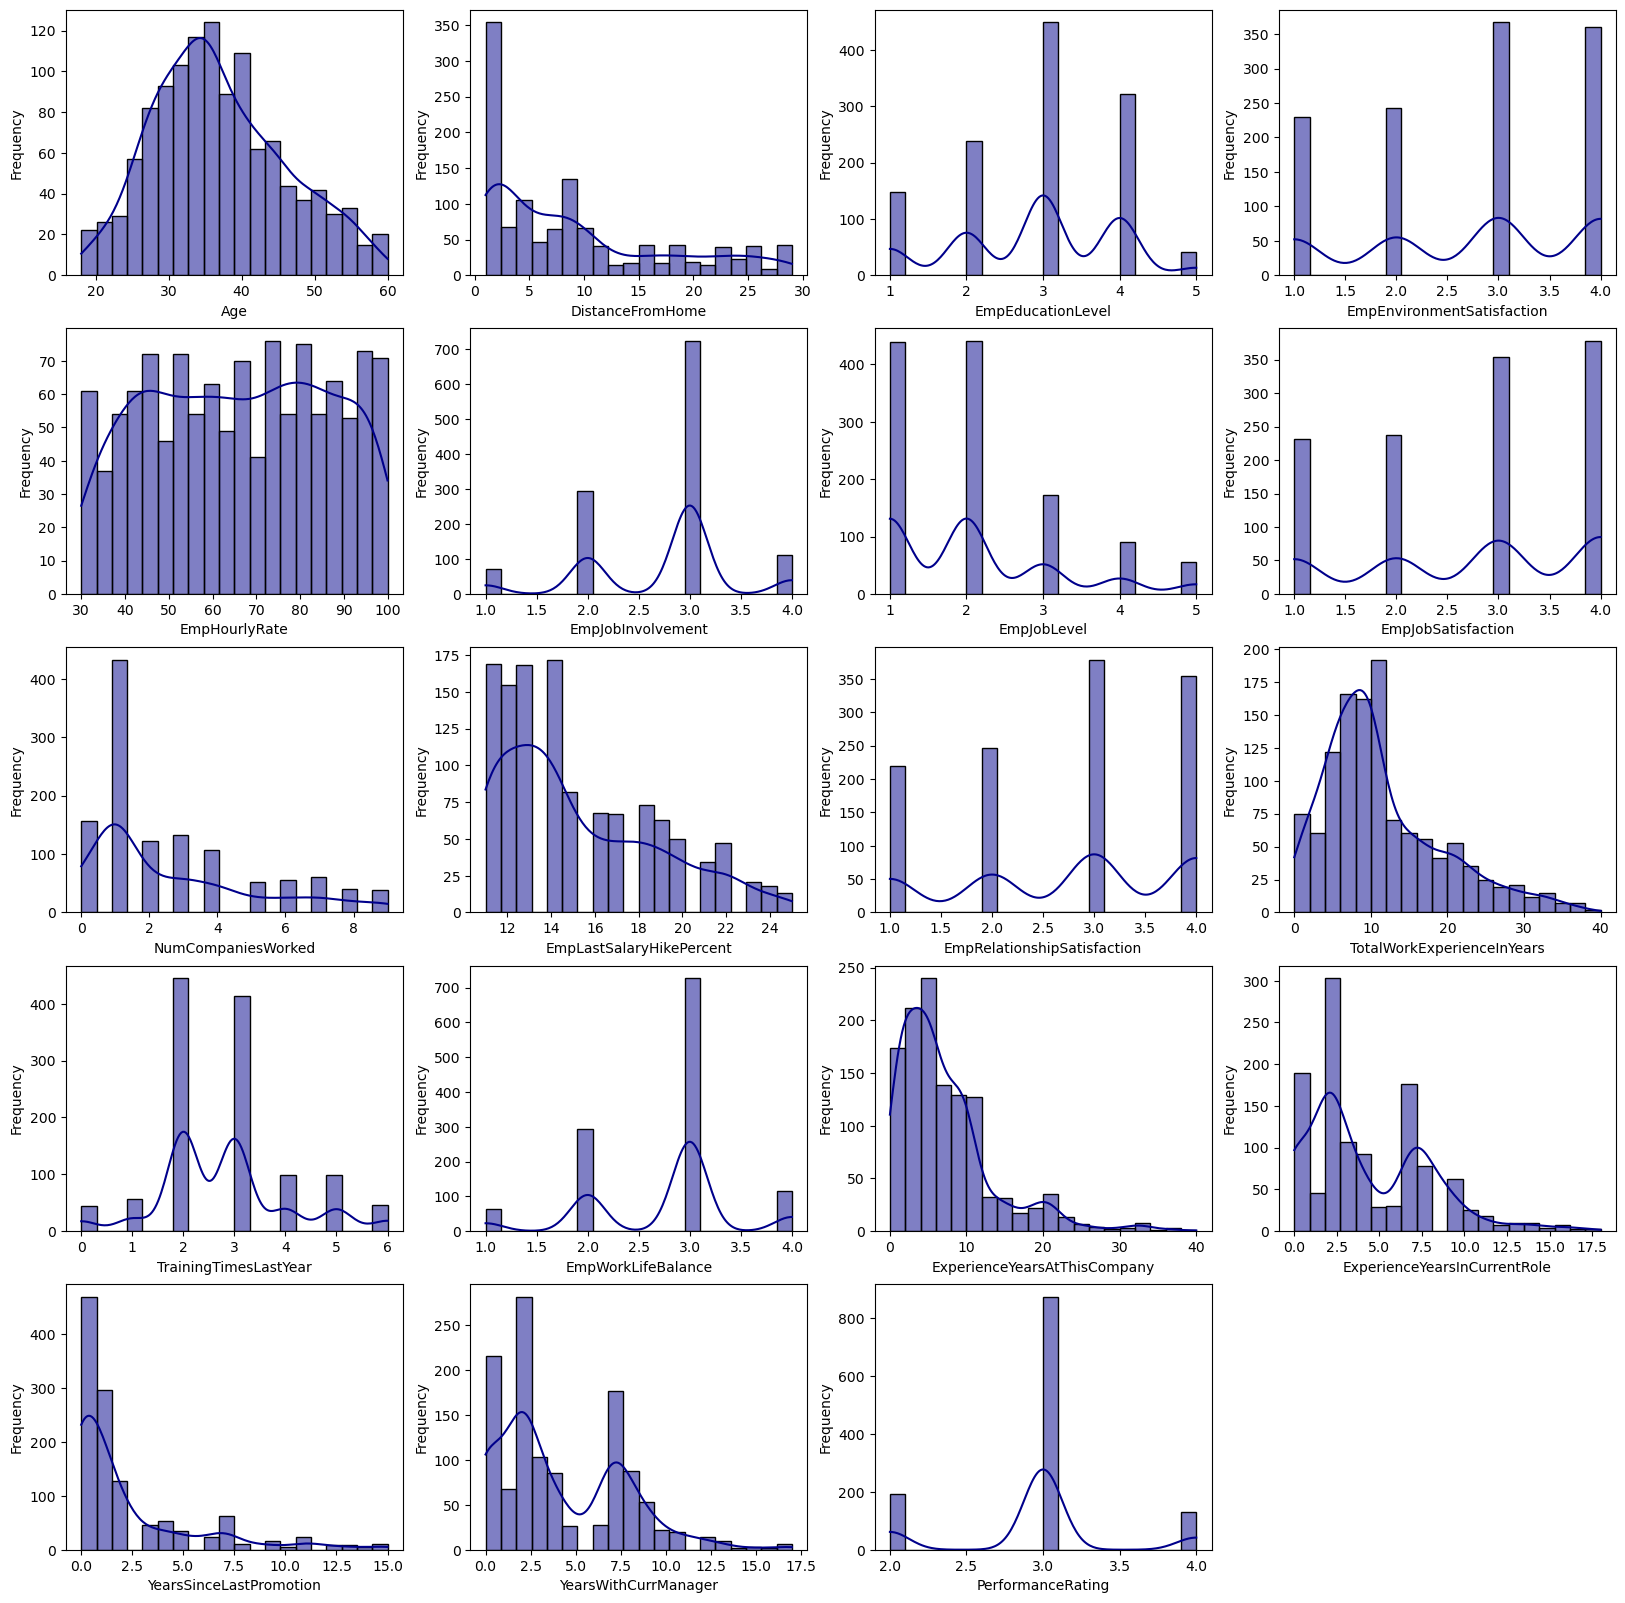

In [46]:
plt.figure(figsize=(20, 20))

# Loop through the numerical columns to plot histograms
plot = 1
for col in numerical_cols:
    if plot <= 19: 
        ax = plt.subplot(5, 4, plot) 
        sns.histplot(df[col], kde=True, bins=20, color='darkblue')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plot += 1

#### INSIGHTS : 

- Age : most employees are bewteen 25 and 40 years old,indicting that a young employees are more
- DistanceFromHome : many employees live close to the office ,but some employees travel long distance 
- Education Level :  many employees have diffrent education level but most levels 3 and 4
- emp Environment Satisfaction : most employees rate their workplace satisfaction as good level 3 and 4 means they are generally happy at wrok.
- EmpHourlyRate : Employees earn different hourly rates, with no extreme differences.
- EmpJobInvolvement : we can see most of employees are highly involved in their work level is 3
- EmpJobLevel : we can see levels of 1 2 and 3 are most common level involved in the company means not involved senior levels.
- emp job satisfaction : many employees are satisfied with their jobs level 3 and 4 which is good.
- num_companiesworked : average of employees have only worked at one company.
- emp last salary hike percentage : Most salary increases are between 12% and 20% 
- emp relationship satisfaction : many employees are satisfied with their colleagues and managers with level 3 and 4 thats good but others have not good relationship.
- TotalWorkExperienceInYears : we can see mix of experienced years with many employees having between 6 to 15.
- TrainingTimesLastYear : employees received training 2,3 times last year.
- emp work life balance : many employees rate their work life balance mostly 3 levels and rarely 2 or 4.
- ExperienceYearsAtThisCompany : most of employees worked between 3 to 10 yers and average work experienced is 7 years .
- emperience years in current role : we can see most of employees work with same role between 2 to 7 years 
-  Years Since Last Promotion: Many employees haven’t received a promotion in over 3 years.
-  Years with Current Manager: Employees usually stay with the current  manager for 2 to 7 years.
-  Performance Rating: Most employees have a performance rating of 3  meaning they are doing well but rarely peoples have 4 ratings they doing best and most peoples have 2 ratings they need to increase their performance.                                                                            

## KDE plotting for numerical features

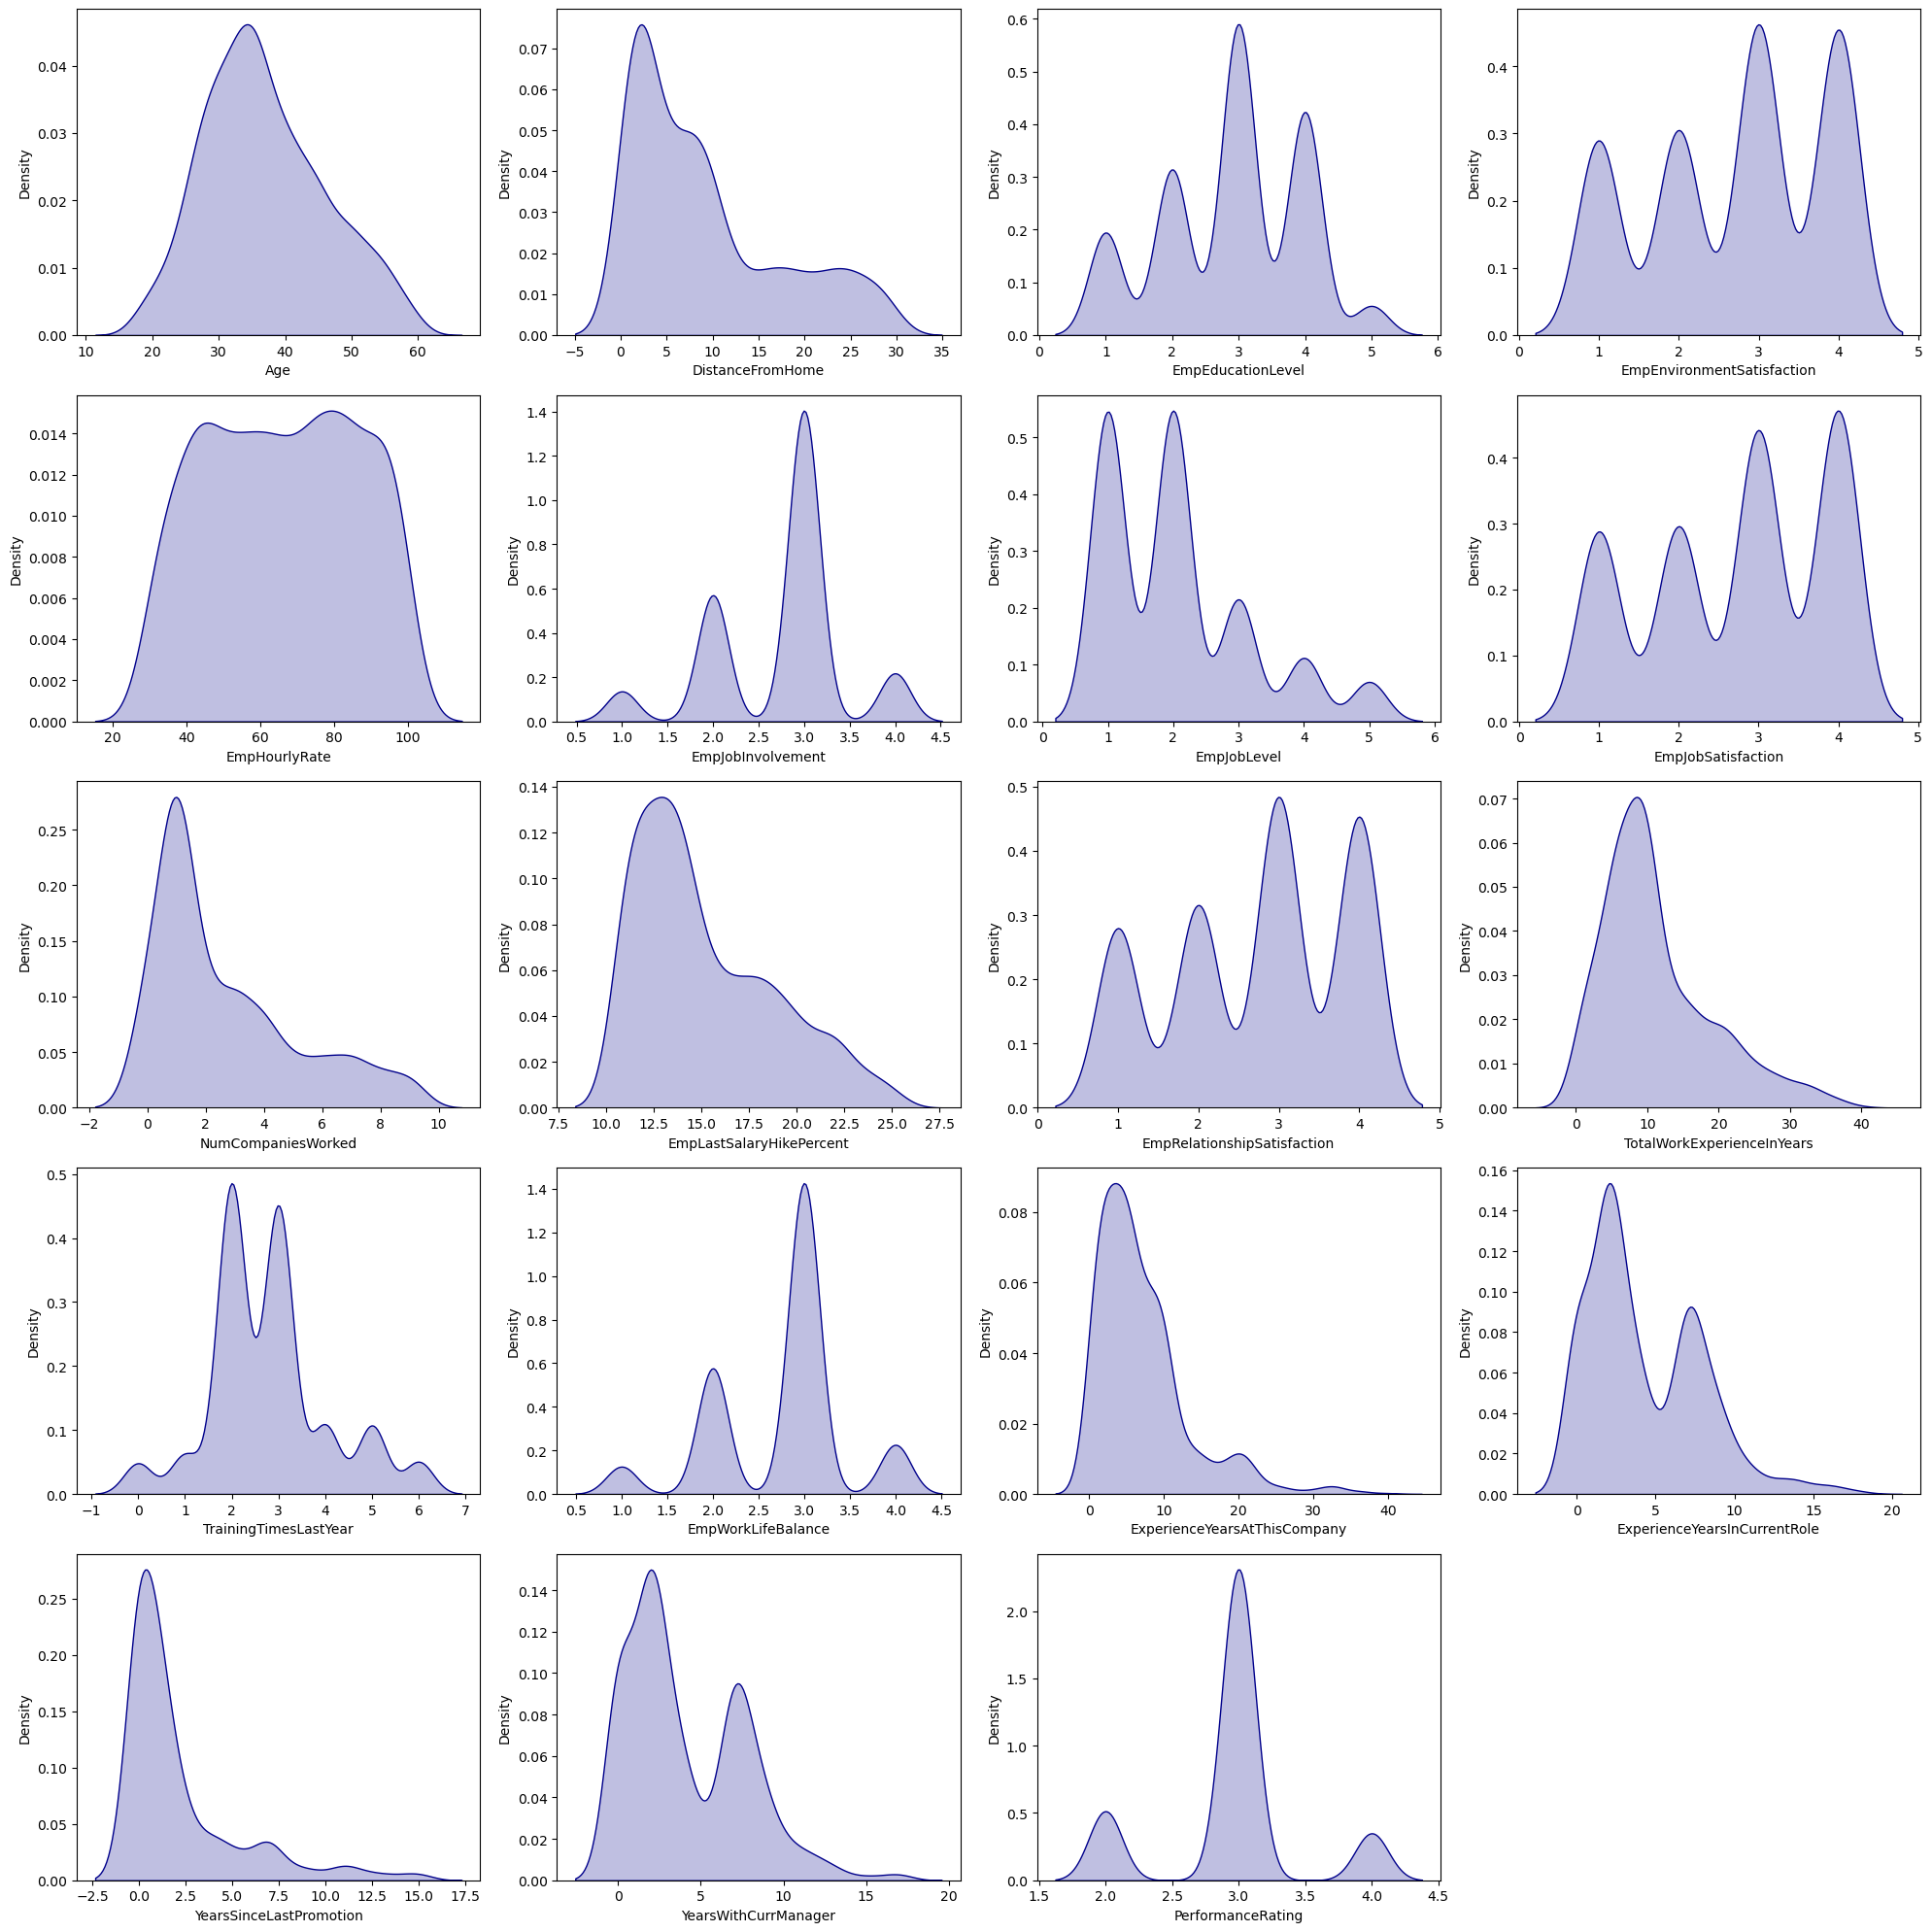

In [50]:
plt.figure(figsize=(20, 20))

# Loop through numerical columns to plot KDE plots
plot = 1
for col in numerical_cols:
    if plot <= 19:  
        ax = plt.subplot(5, 4, plot)  
        sns.kdeplot(df[col], fill=True, color='darkblue')  
        plt.xlabel(col)  
        plt.ylabel('Density')  
        plot += 1  

plt.tight_layout()  # Adjusts layout for better spacing
plt.show()


- most of the plots are multimodal,showing diffrent peaks
- the distribution shows skewed right skewed and left skewed
- The distribution is not normal, it has multiple peaks

## Count plot for Categorical features

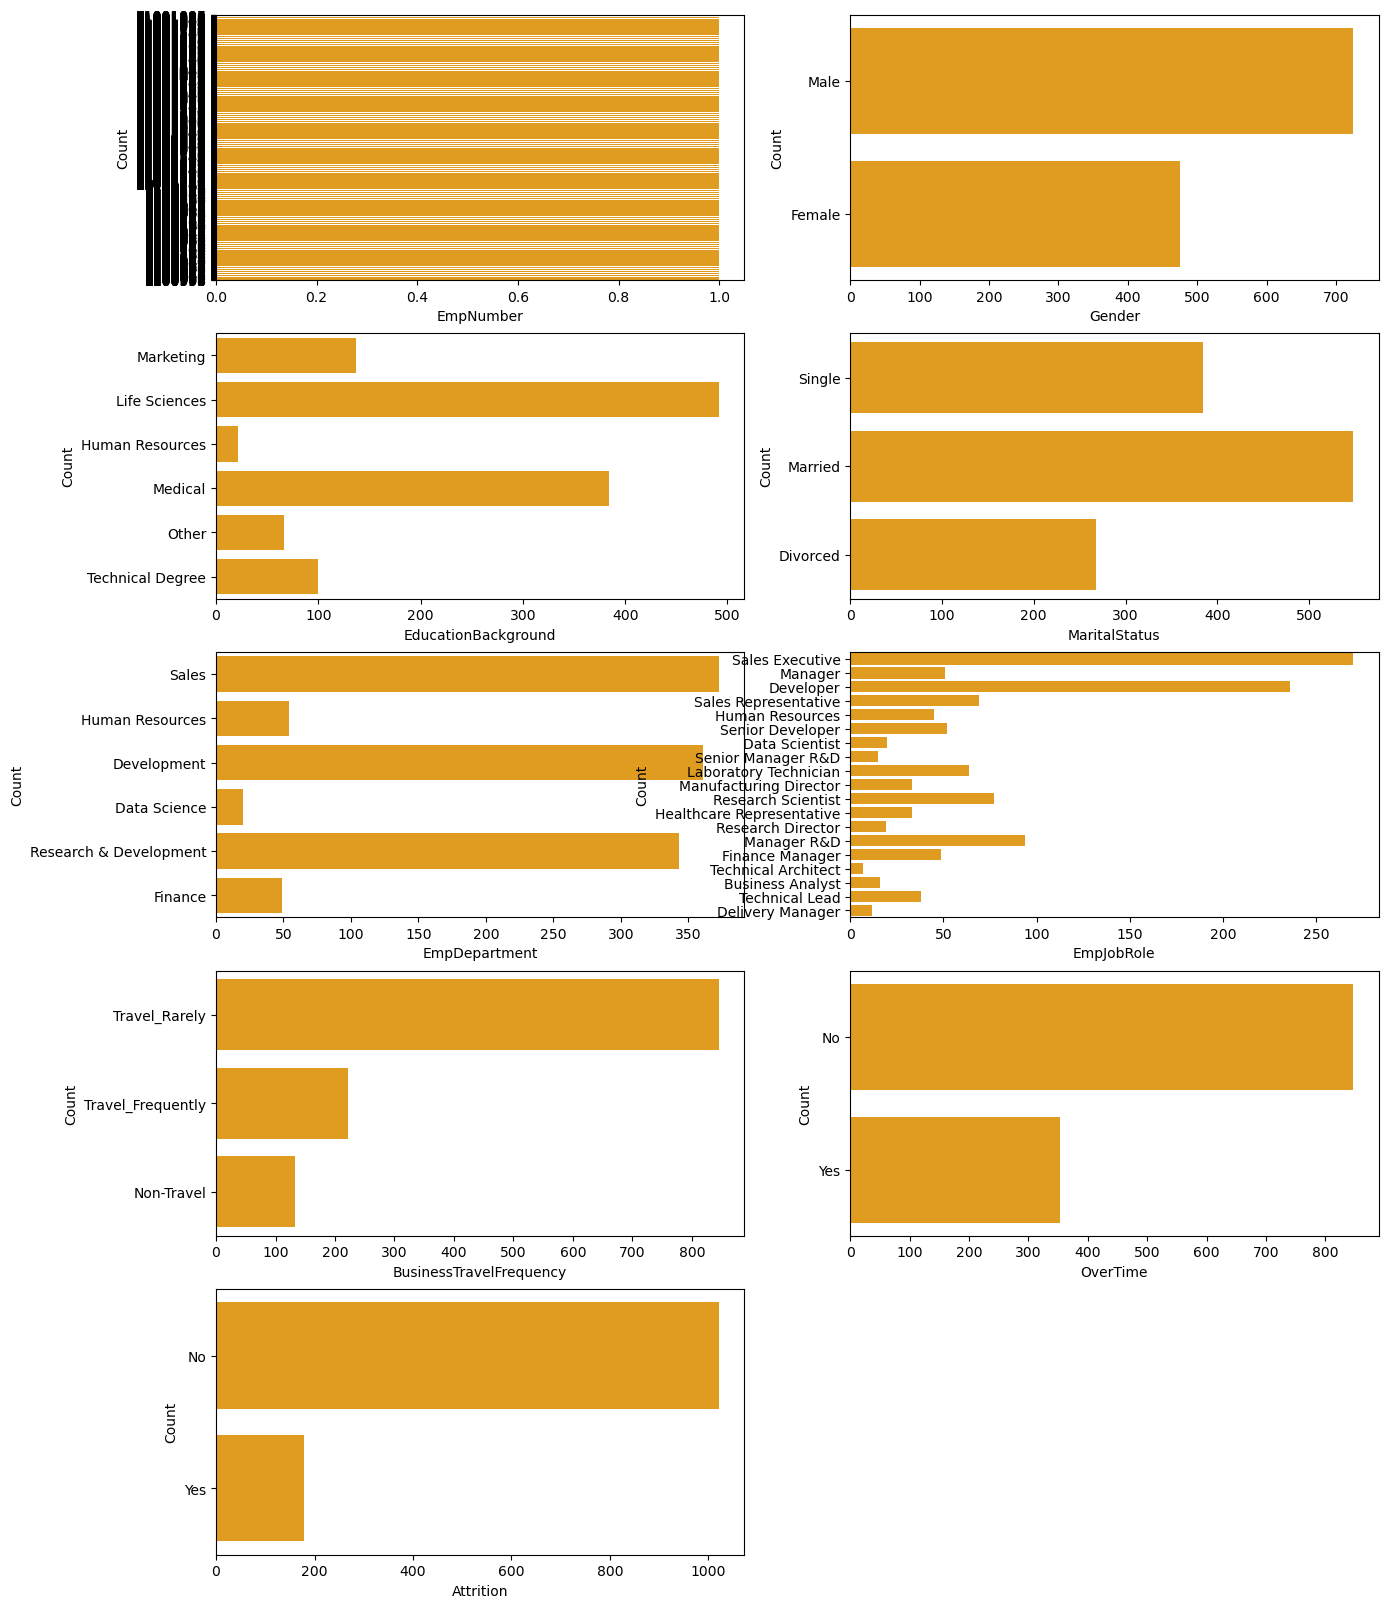

In [53]:
plt.figure(figsize=(15, 20))


plot = 1
for col in categorical_cols:
    if plot <= 9: 
        ax = plt.subplot(5, 2, plot) 
        sns.countplot(df[col],color='orange')
        plt.xlabel(col)
        plt.ylabel('Count')
        plot += 1

#### INSIGHTS : 

- EmpNumber : This is unique number for each employees so not need this column for prediction 
- Gender : we cann see most employees are male.
- Education Background : most employees studied from life science , medical and marketing field .
- Marital Status: most employees are married then single are moderately but divorced employees are lower.
- emp Department: most employees working with sales ,development and research and developement departments.
- emp Job Role: the most common employees job roles are sales excecutive and developers.
- Business Travel frequency :  Most employees travel rarely for work, but a few travel frequently.
- Overtime : Most employees do not work overtime, but a small group does.
- Attrition : Most employees stay in the company, but some leave.

## Bivariate Analysis

##  Distribution of Numerical Features by Performance Rating

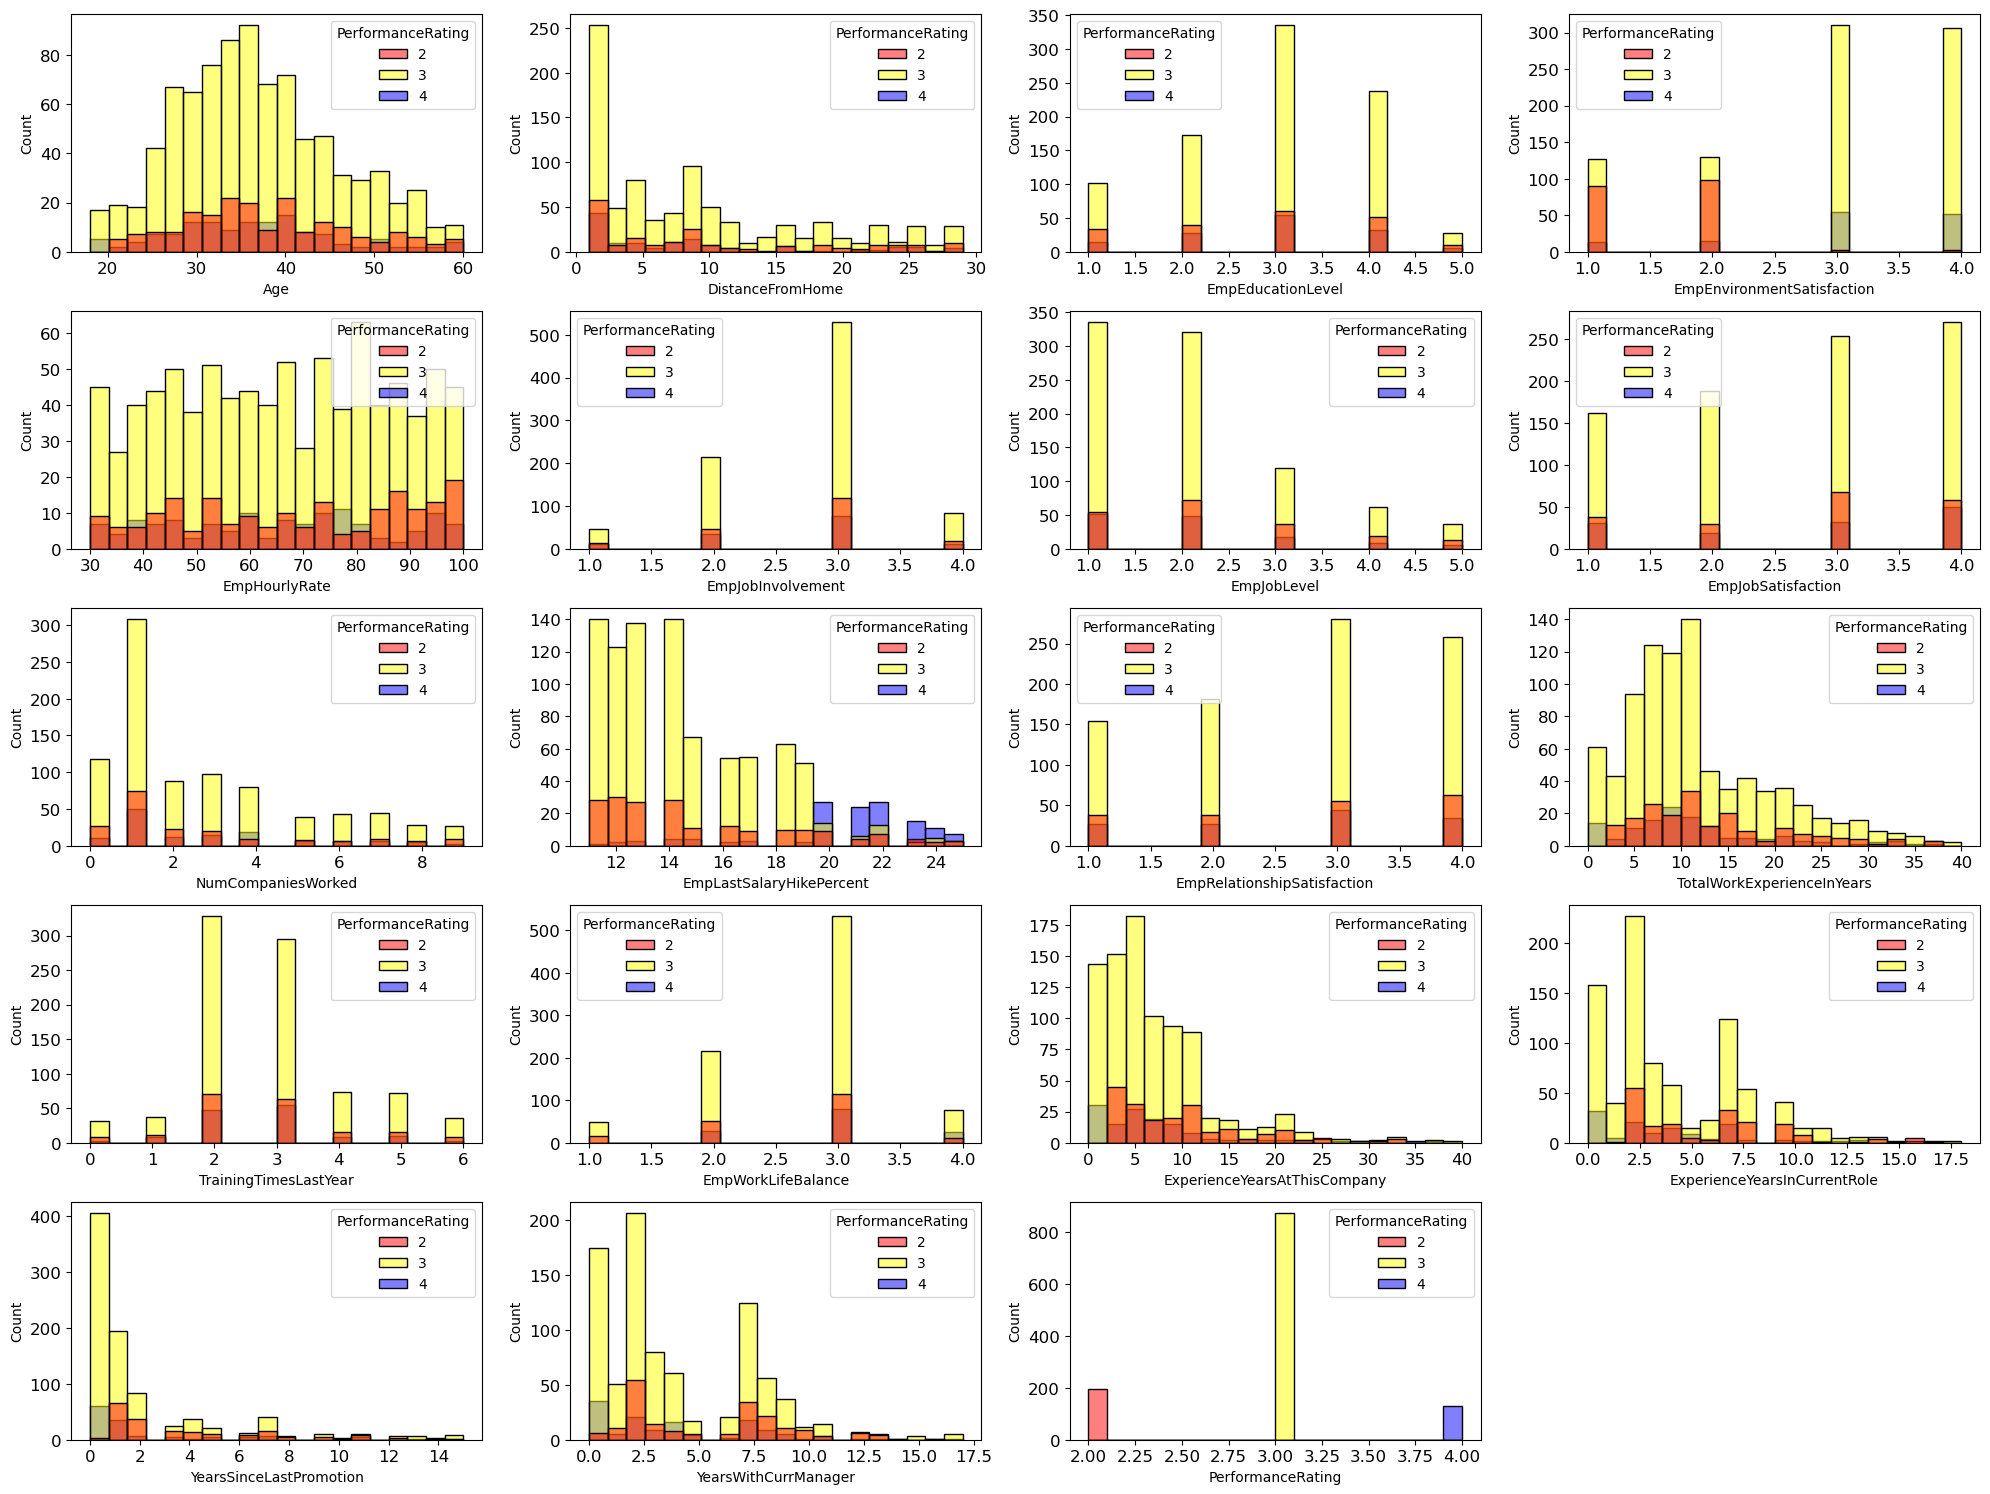

In [58]:
plt.figure(figsize=(20,15))  
plotnumber = 1             

for col in numerical_cols:  
    plt.subplot(5, 4, plotnumber) 
    sns.histplot(data=df, x=col, hue="PerformanceRating", palette=["red", "yellow", "blue"], bins=20)
    plt.xticks(fontsize=12) 
    plt.yticks(fontsize=12)  
    plotnumber += 1        

plt.tight_layout()          
plt.show()                  


- This visualization shows the distribution of numerical features, categorized by Performance Rating (2, 3, 4) using different colors
- In almost every numeric column, rating 3 is the biggest group, while ratings 2 and 4 appear less often . This shows that most employees in the mid-performance range
- This distribution indicates that any predictive model needs special attention for classes 2 and 4 (the minority classes) to avoid biasing toward the majority class 3.

##  Distribution of Categorical Features by Performance Rating

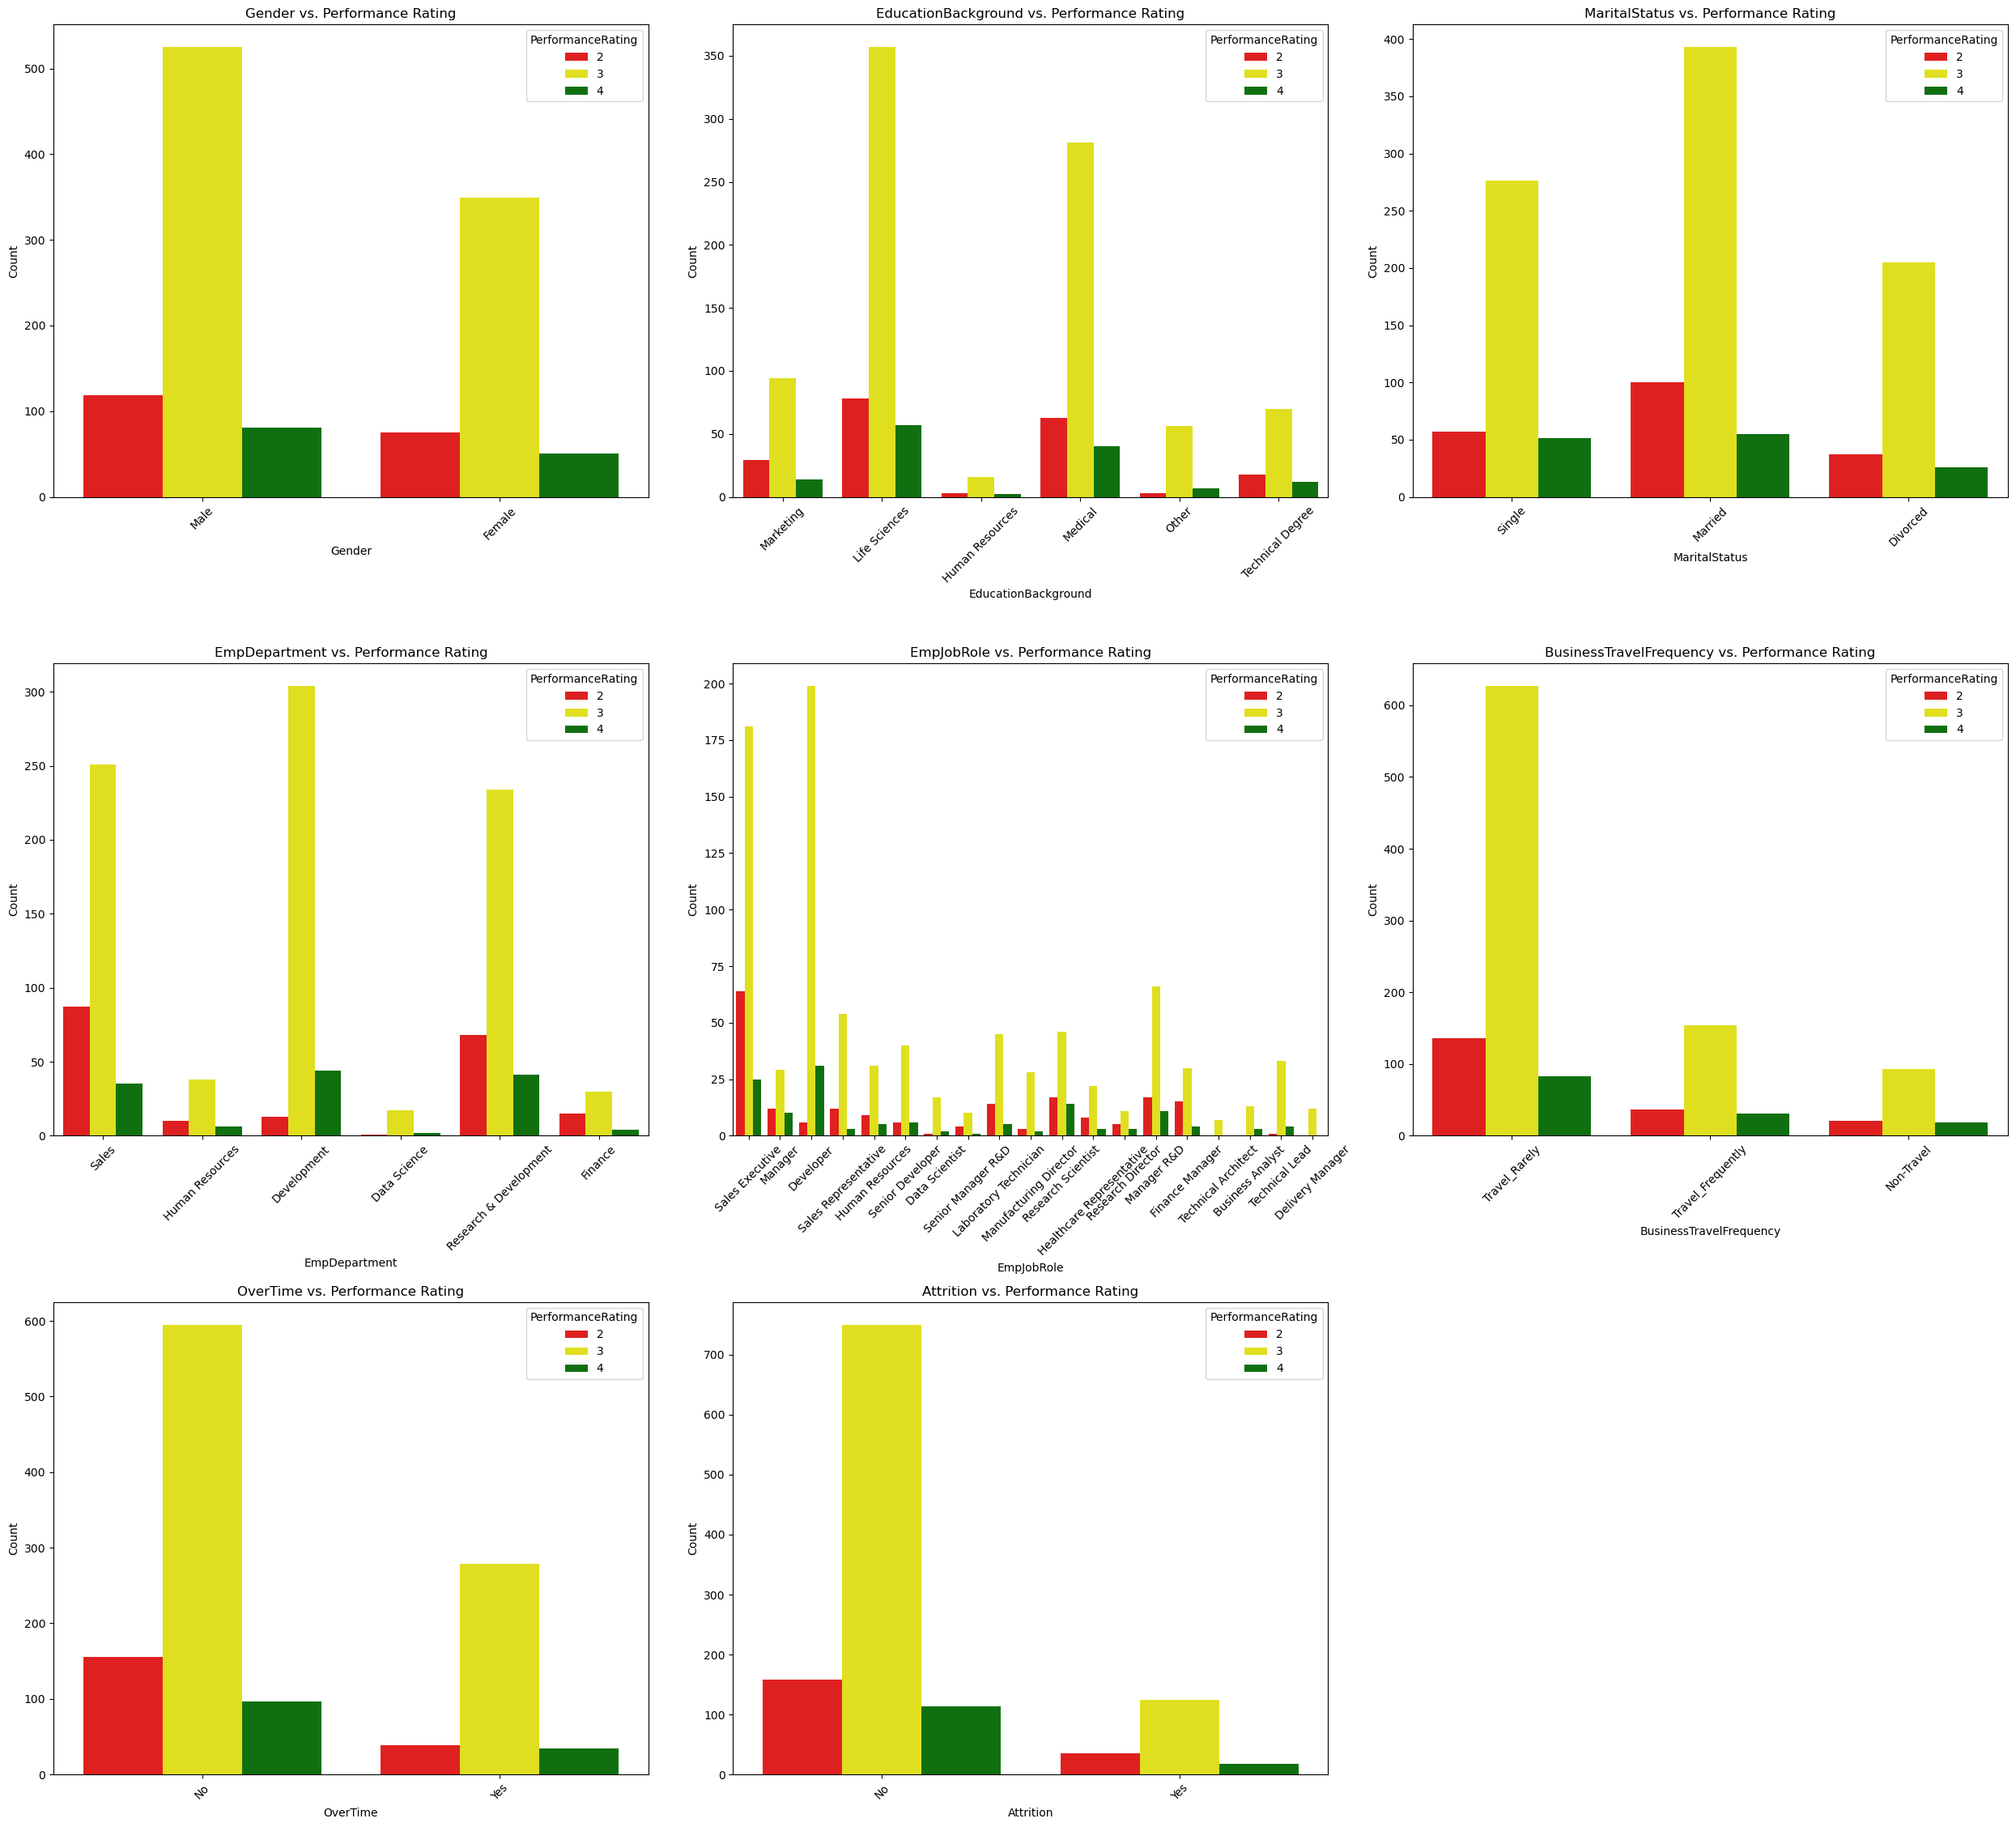

In [61]:
plt.figure(figsize=(25, 30))
plot = 1
for col in categorical_cols:
    if col != "EmpNumber":  # Exclude Employee ID
        ax = plt.subplot(4, 3, plot)  
        sns.countplot(x=df[col], hue=df["PerformanceRating"], palette=["red", "yellow", "green"])
        plt.xticks(rotation=45)
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.title(f"{col} vs. Performance Rating")
        plot += 1

plt.tight_layout()
plt.show()

- Across all these categories, rating 3 is consistently the largest group, with ratings 2 and 4 remaining smaller segments regardless of gender, education, department, or other categorical factors.

## Multivariate Analysis

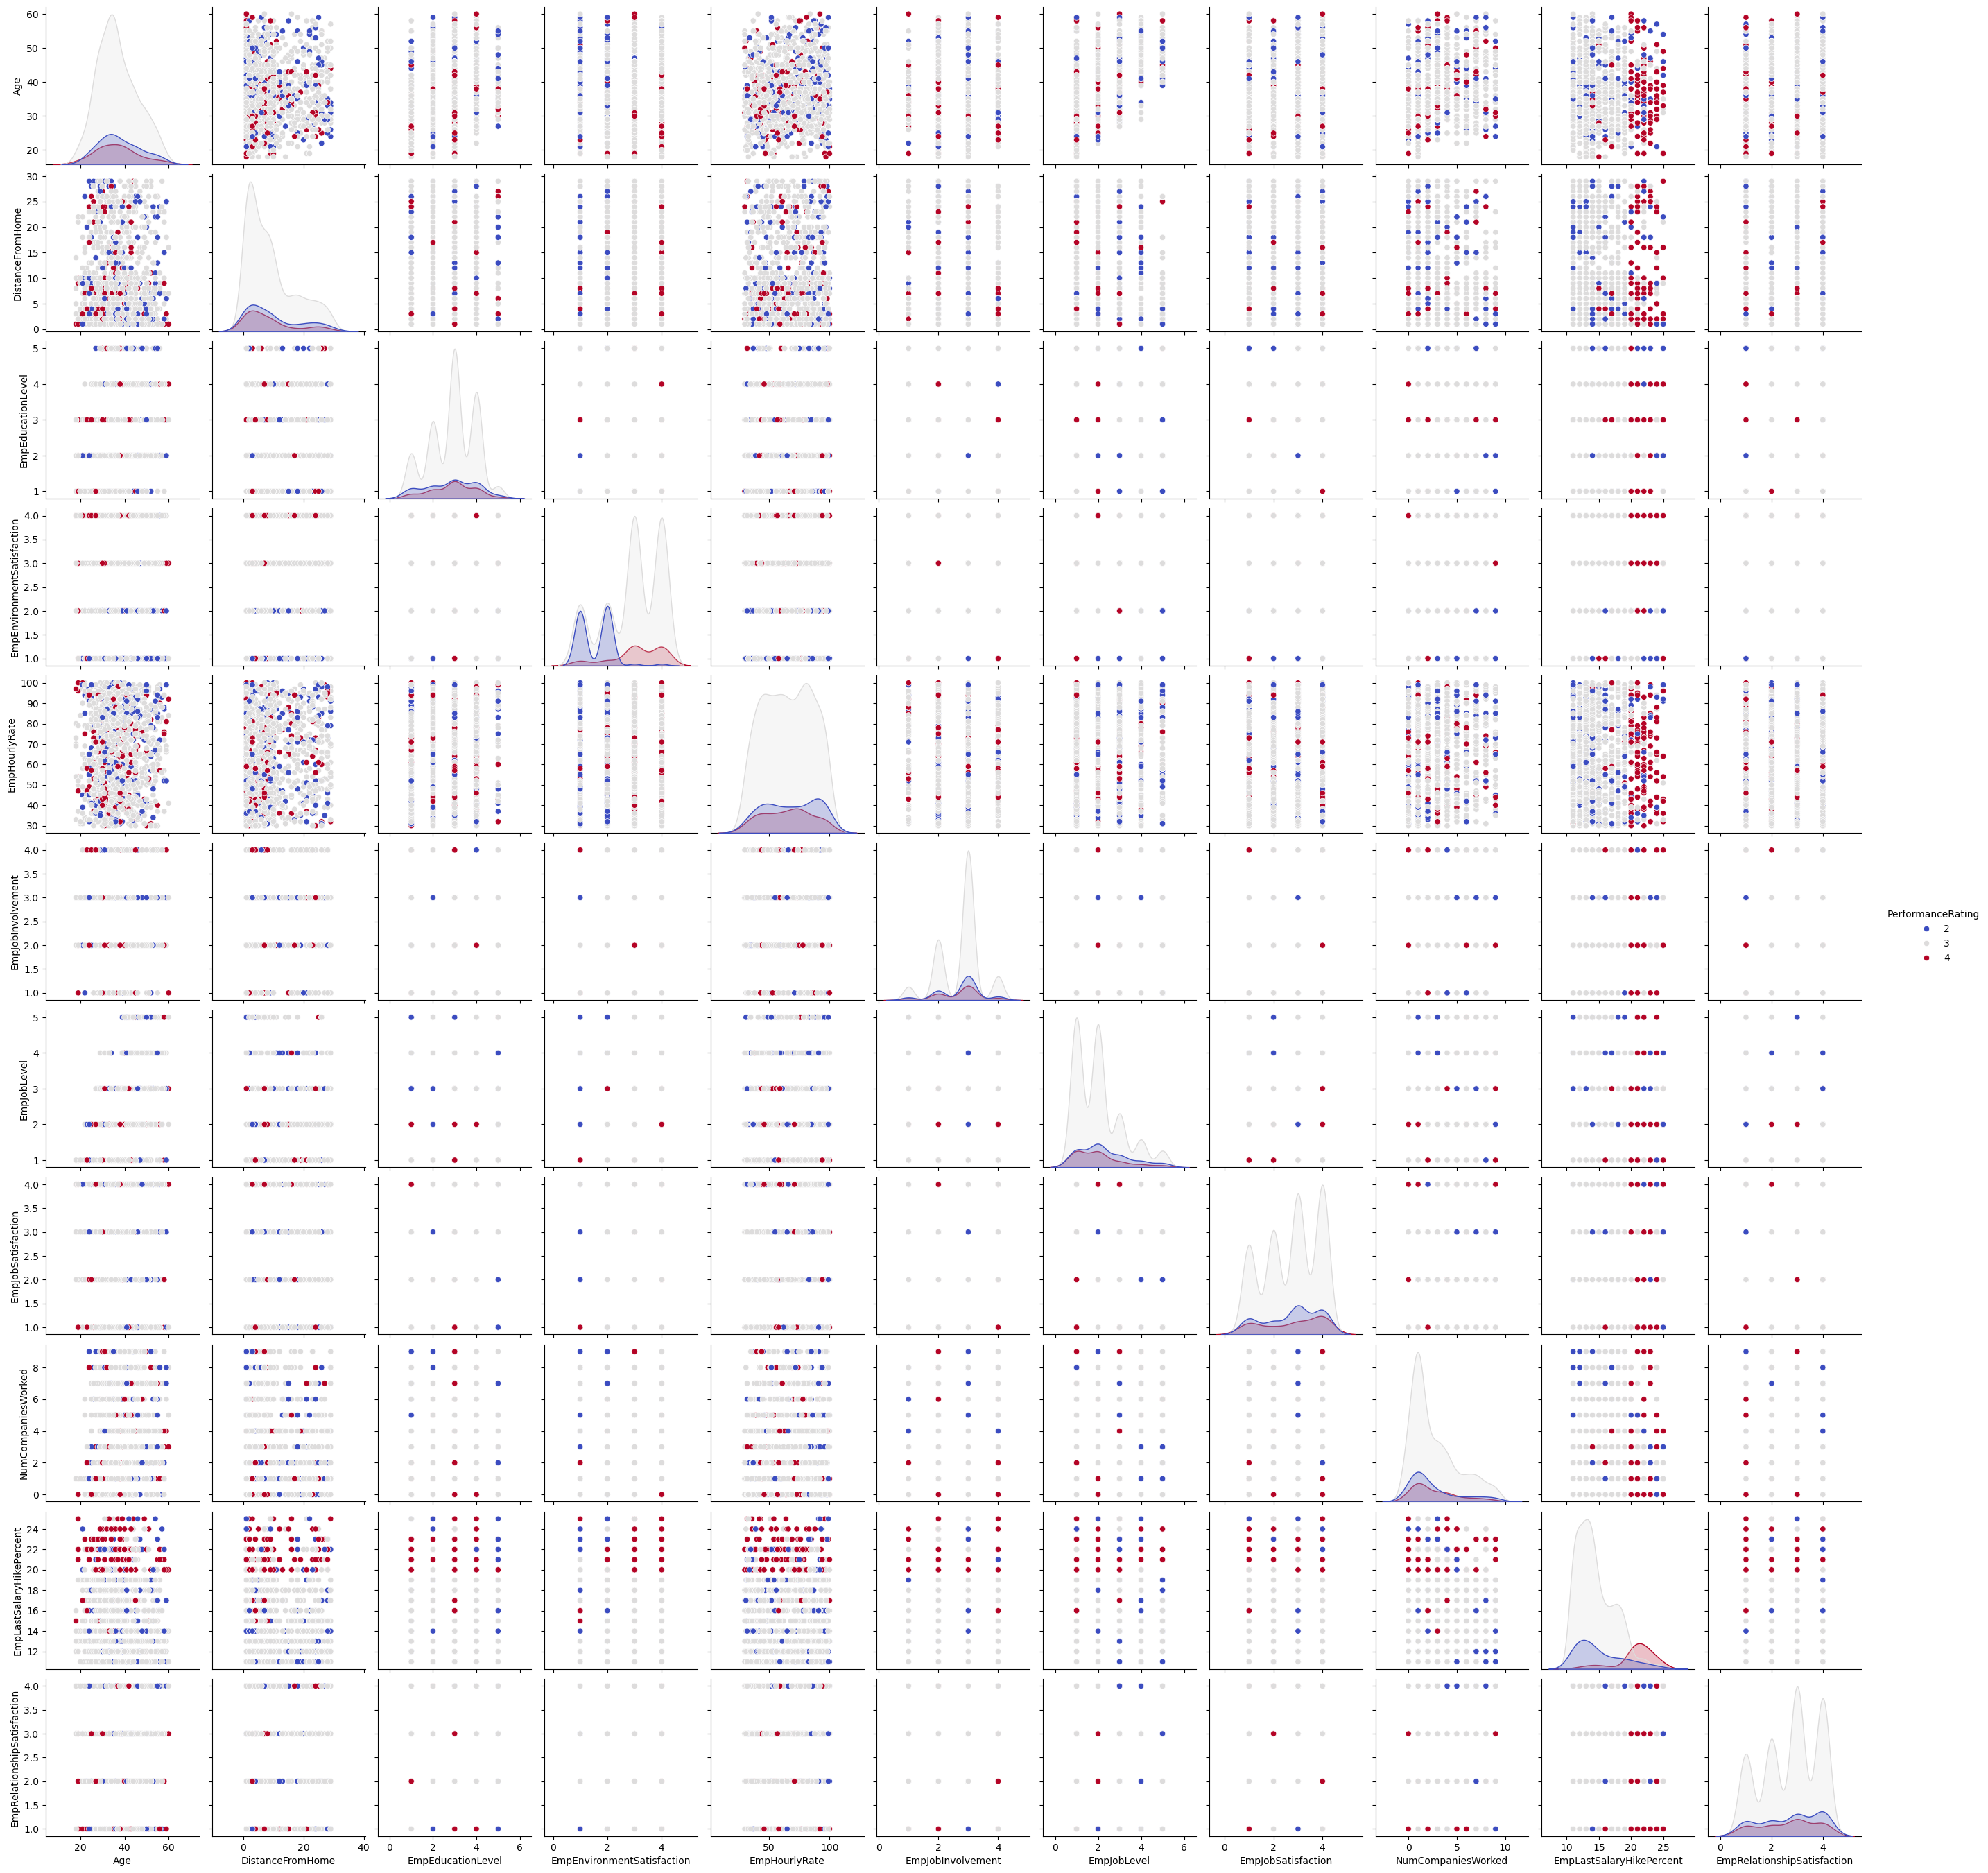

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define numerical columns for two parts
numerical_cols_part1 = ['Age', 'DistanceFromHome', 'EmpEducationLevel',
                         'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
                         'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked',
                         'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction']

numerical_cols_part2 = ['TotalWorkExperienceInYears', 'TrainingTimesLastYear',
                         'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
                         'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
                         'YearsWithCurrManager', 'PerformanceRating']

# Pairplot for Part 1
sns.pairplot(df[numerical_cols_part1 + ['PerformanceRating']], hue='PerformanceRating', palette='coolwarm', diag_kind='kde')
plt.show()


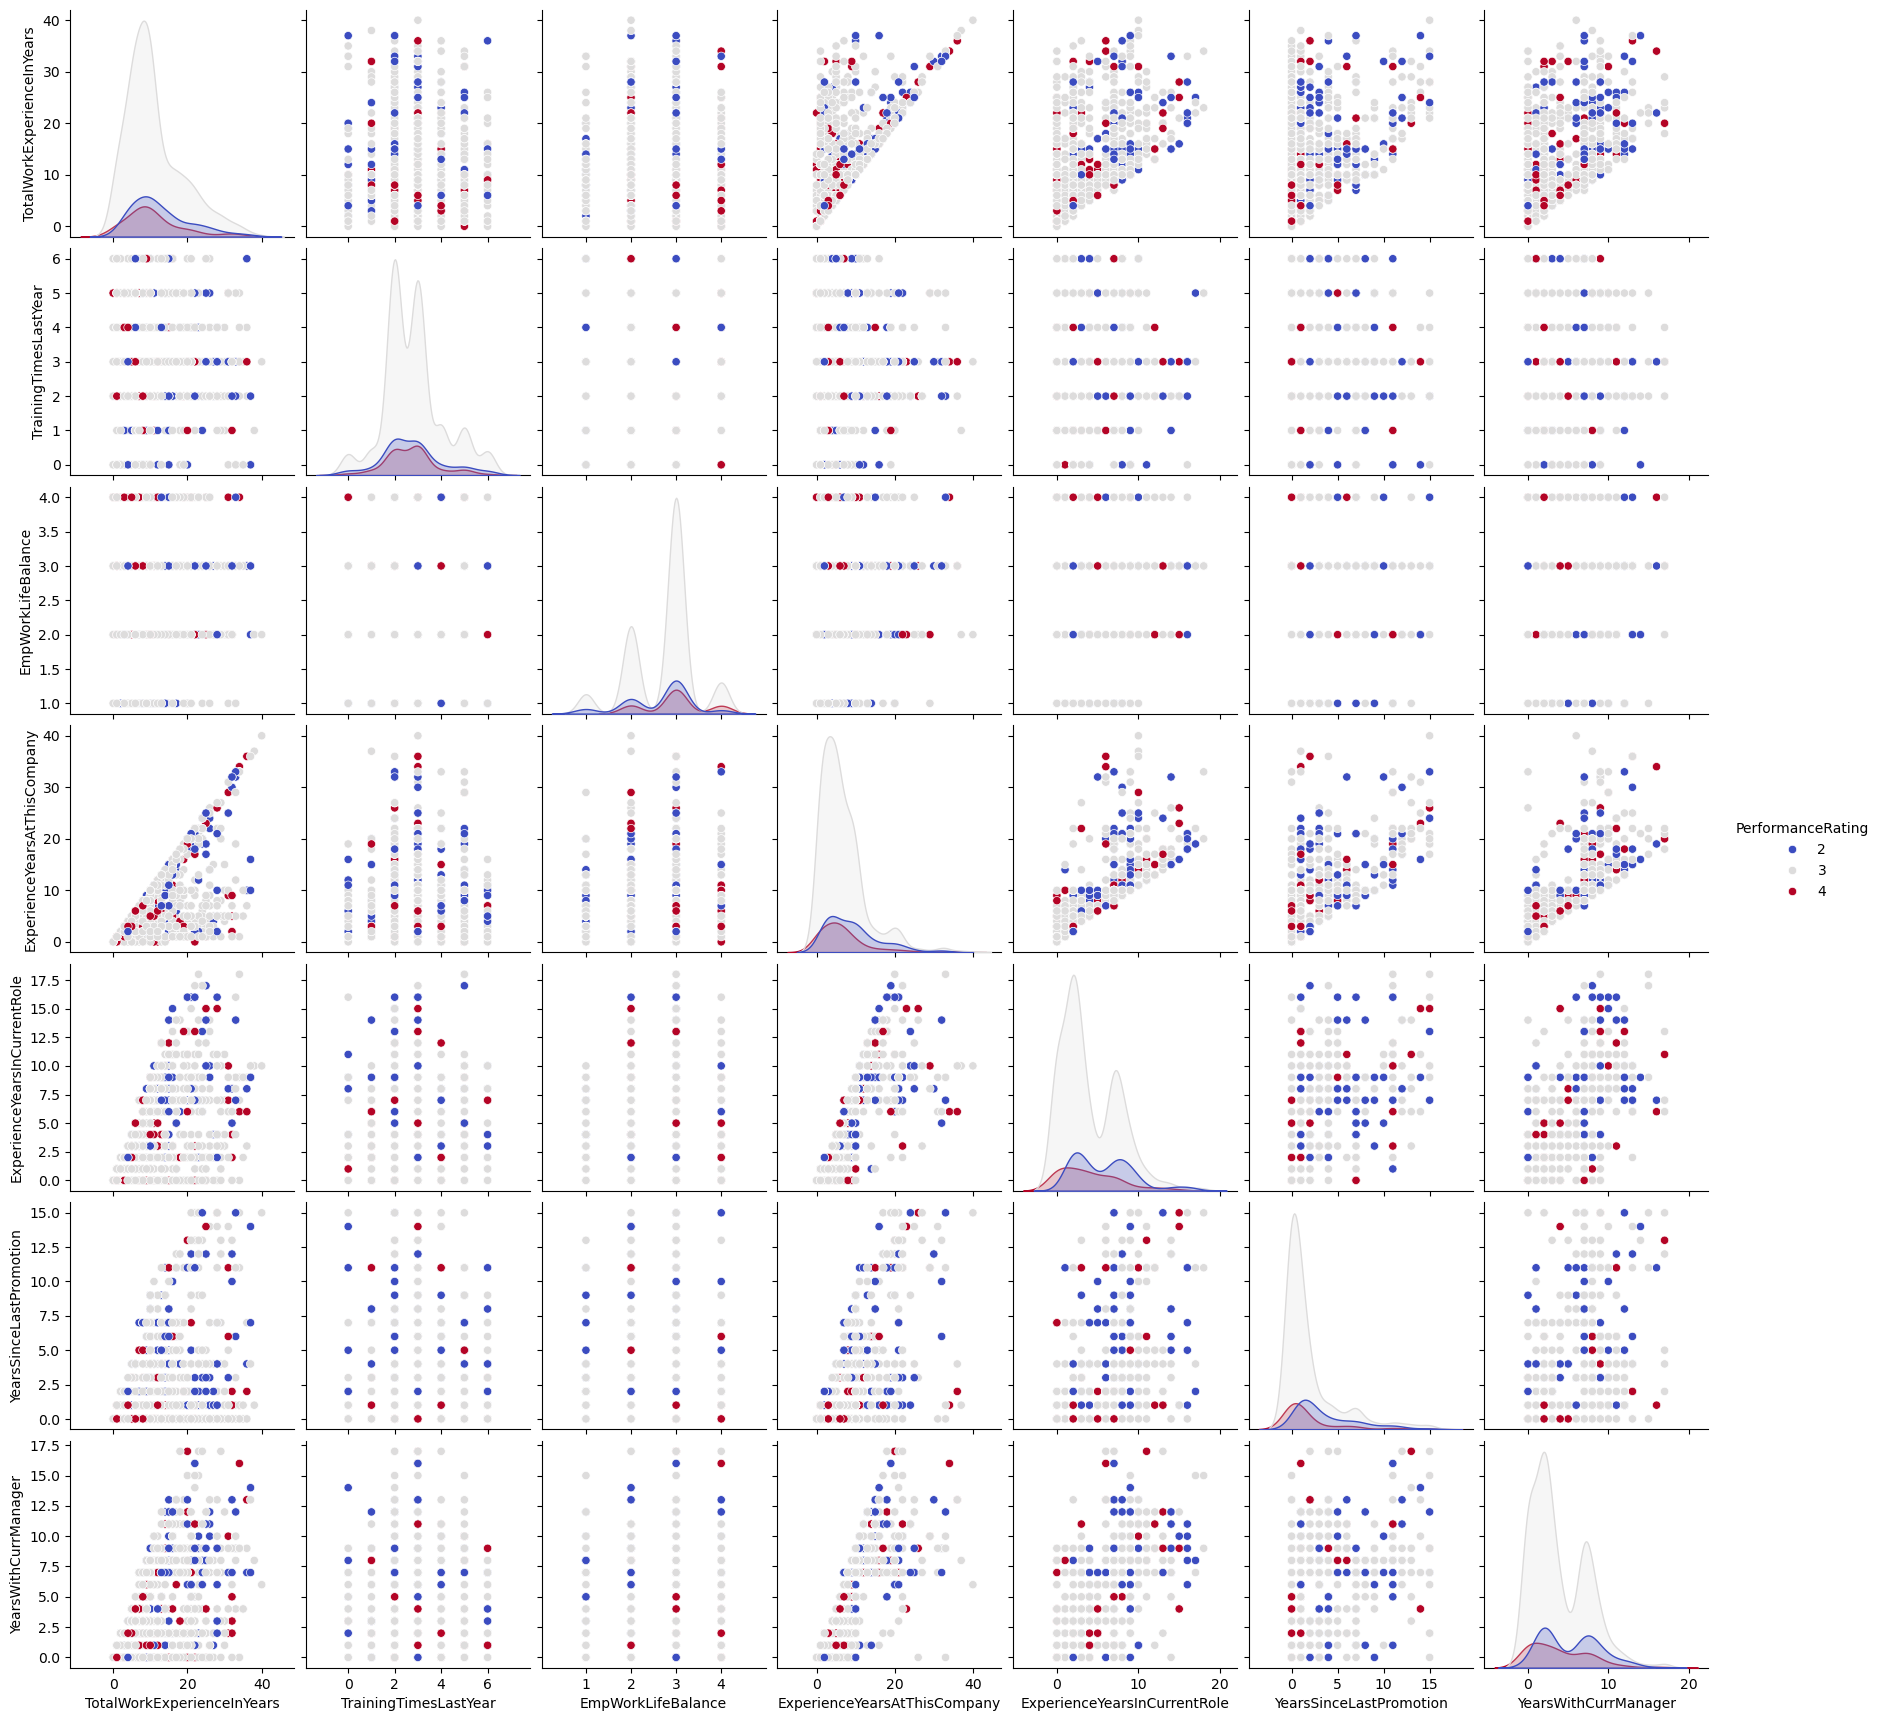

In [65]:
# Pairplot for Part 2
sns.pairplot(df[numerical_cols_part2], hue='PerformanceRating', palette='coolwarm', diag_kind='kde')
plt.show()

- There are strong positive correlations between Total Work Experience, Experience at Company, and Job Level, indicating that employees with longer experience tend to hold higher positions.

- Job Satisfaction, Work-Life Balance, and Job Involvement show variations in Performance Ratings, suggesting these factors significantly influence employee performance.

## Data Preprocessing

##  Checking Missing values

In [69]:
df.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

Here we can see our data is clean we don't have any missing values

In [71]:
df.select_dtypes(include='object')

EmpNumber  Gender EducationBackground MaritalStatus    EmpDepartment  \
0     E1001000    Male           Marketing        Single            Sales   
1     E1001006    Male           Marketing        Single            Sales   
2     E1001007    Male       Life Sciences       Married            Sales   
3     E1001009    Male     Human Resources      Divorced  Human Resources   
4     E1001010    Male           Marketing        Single            Sales   
...        ...     ...                 ...           ...              ...   
1195   E100992  Female             Medical      Divorced            Sales   
1196   E100993    Male       Life Sciences        Single      Development   
1197   E100994    Male             Medical       Married      Development   
1198   E100995  Female             Medical        Single     Data Science   
1199   E100998  Female       Life Sciences        Single            Sales   

            EmpJobRole BusinessTravelFrequency OverTime Attrition  
0      Sales Executive           Travel_Rarely       No        No  
1      Sales Executive           Travel_Rarely       No        No  
2      Sales Executive       Travel_Frequently      Yes        No  
3              Manager           Travel_Rarely       No        No  
4      Sales Executive           Travel_Rarely       No        No  
...                ...                     ...      ...       ...  
1195   Sales Executive       Travel_Frequently      Yes        No  
1196  Senior Developer           Travel_Rarely       No        No  
1197  Senior Developer           Travel_Rarely      Yes        No  
1198    Data Scientist           Travel_Rarely       No        No  
1199   Sales Executive           Travel_Rarely       No       Yes  

[1200 rows x 9 columns]

## Dropping Unnecessary column
- EmpNumber → This is just an ID column, which doesn’t help in predictions.

In [73]:
df.drop(columns=['EmpNumber'], inplace=True)

In [74]:
df.head(3)

Age Gender EducationBackground MaritalStatus EmpDepartment  \
0   32   Male           Marketing        Single         Sales   
1   47   Male           Marketing        Single         Sales   
2   40   Male       Life Sciences       Married         Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   

   EmpEducationLevel  EmpEnvironmentSatisfaction  ...  \
0                  3                           4  ...   
1                  4                           4  ...   
2                  4                           4  ...   

   EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                            4                          10   
1                            4                          20   
2                            3                          20   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                      2                   2                            10   
1                      2                   3                             7   
2                      2                   3                            18   

  ExperienceYearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
0                            7                        0                     8   
1                            7                        1                     7   
2                           13                        1                    12   

   Attrition  PerformanceRating  
0         No                  3  
1         No                  3  
2         No                  4  

[3 rows x 27 columns]

## Checking Value counts for catagorical Columns

In [76]:
categorical_cols

Index(['EmpNumber', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime',
       'Attrition'],
      dtype='object')

In [77]:
df.Gender.value_counts()

Gender
Male      725
Female    475
Name: count, dtype: int64

In [78]:
df.EducationBackground.value_counts()

EducationBackground
Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: count, dtype: int64

In [79]:
df.MaritalStatus.value_counts()

MaritalStatus
Married     548
Single      384
Divorced    268
Name: count, dtype: int64

In [80]:
df.EmpDepartment.value_counts()

EmpDepartment
Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: count, dtype: int64

In [81]:
df.EmpJobRole.value_counts()

EmpJobRole
Sales Executive              270
Developer                    236
Manager R&D                   94
Research Scientist            77
Sales Representative          69
Laboratory Technician         64
Senior Developer              52
Manager                       51
Finance Manager               49
Human Resources               45
Technical Lead                38
Manufacturing Director        33
Healthcare Representative     33
Data Scientist                20
Research Director             19
Business Analyst              16
Senior Manager R&D            15
Delivery Manager              12
Technical Architect            7
Name: count, dtype: int64

In [82]:
df.BusinessTravelFrequency.value_counts()

BusinessTravelFrequency
Travel_Rarely        846
Travel_Frequently    222
Non-Travel           132
Name: count, dtype: int64

In [83]:
df.OverTime.value_counts()

OverTime
No     847
Yes    353
Name: count, dtype: int64

In [84]:
df.Attrition.value_counts()

Attrition
No     1022
Yes     178
Name: count, dtype: int64

## Converting Categorical Data to Numerical By Encoding

In [86]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to all object dtype columns
for col in df.select_dtypes(include='object').columns:
    df[col] = label_encoder.fit_transform(df[col])

# Check the transformed data
df.head()


Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  EmpJobRole  \
0   32       1                    2              2              5          13   
1   47       1                    2              2              5          13   
2   40       1                    1              1              5          13   
3   41       1                    0              0              3           8   
4   60       1                    2              2              5          13   

   BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0                        2                10                  3   
1                        2                14                  4   
2                        1                 5                  4   
3                        2                10                  4   
4                        2                16                  4   

   EmpEnvironmentSatisfaction  ...  EmpRelationshipSatisfaction  \
0                           4  ...                            4   
1                           4  ...                            4   
2                           4  ...                            3   
3                           2  ...                            2   
4                           1  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

   YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                        0                     8          0                  3  
1                        1                     7          0                  3  
2                        1                    12          0                  4  
3                       12                     6          0                  3  
4                        2                     2          0                  3  

[5 rows x 27 columns]

## Here the code to check encoding properly

In [88]:
for col in df.columns:
    print(f"Column: {col}")
    print("Unique Values:", df[col].unique())
    print("Total Unique Values:", len(df[col].unique()))
    print("_____________________________________________")


Column: Age
Unique Values: [32 47 40 41 60 27 50 28 36 38 44 30 29 42 34 39 56 53 35 52 33 25 45 23
 26 54 37 24 49 55 43 51 22 31 58 20 21 48 19 18 59 46 57]
Total Unique Values: 43
_____________________________________________
Column: Gender
Unique Values: [1 0]
Total Unique Values: 2
_____________________________________________
Column: EducationBackground
Unique Values: [2 1 0 3 4 5]
Total Unique Values: 6
_____________________________________________
Column: MaritalStatus
Unique Values: [2 1 0]
Total Unique Values: 3
_____________________________________________
Column: EmpDepartment
Unique Values: [5 3 1 0 4 2]
Total Unique Values: 6
_____________________________________________
Column: EmpJobRole
Unique Values: [13  8  3 14  6 15  1 16  7 10 12  5 11  9  4 17  0 18  2]
Total Unique Values: 19
_____________________________________________
Column: BusinessTravelFrequency
Unique Values: [2 1 0]
Total Unique Values: 3
_____________________________________________
Column: DistanceFro

## Checking for outliers BY Plotting Boxplot

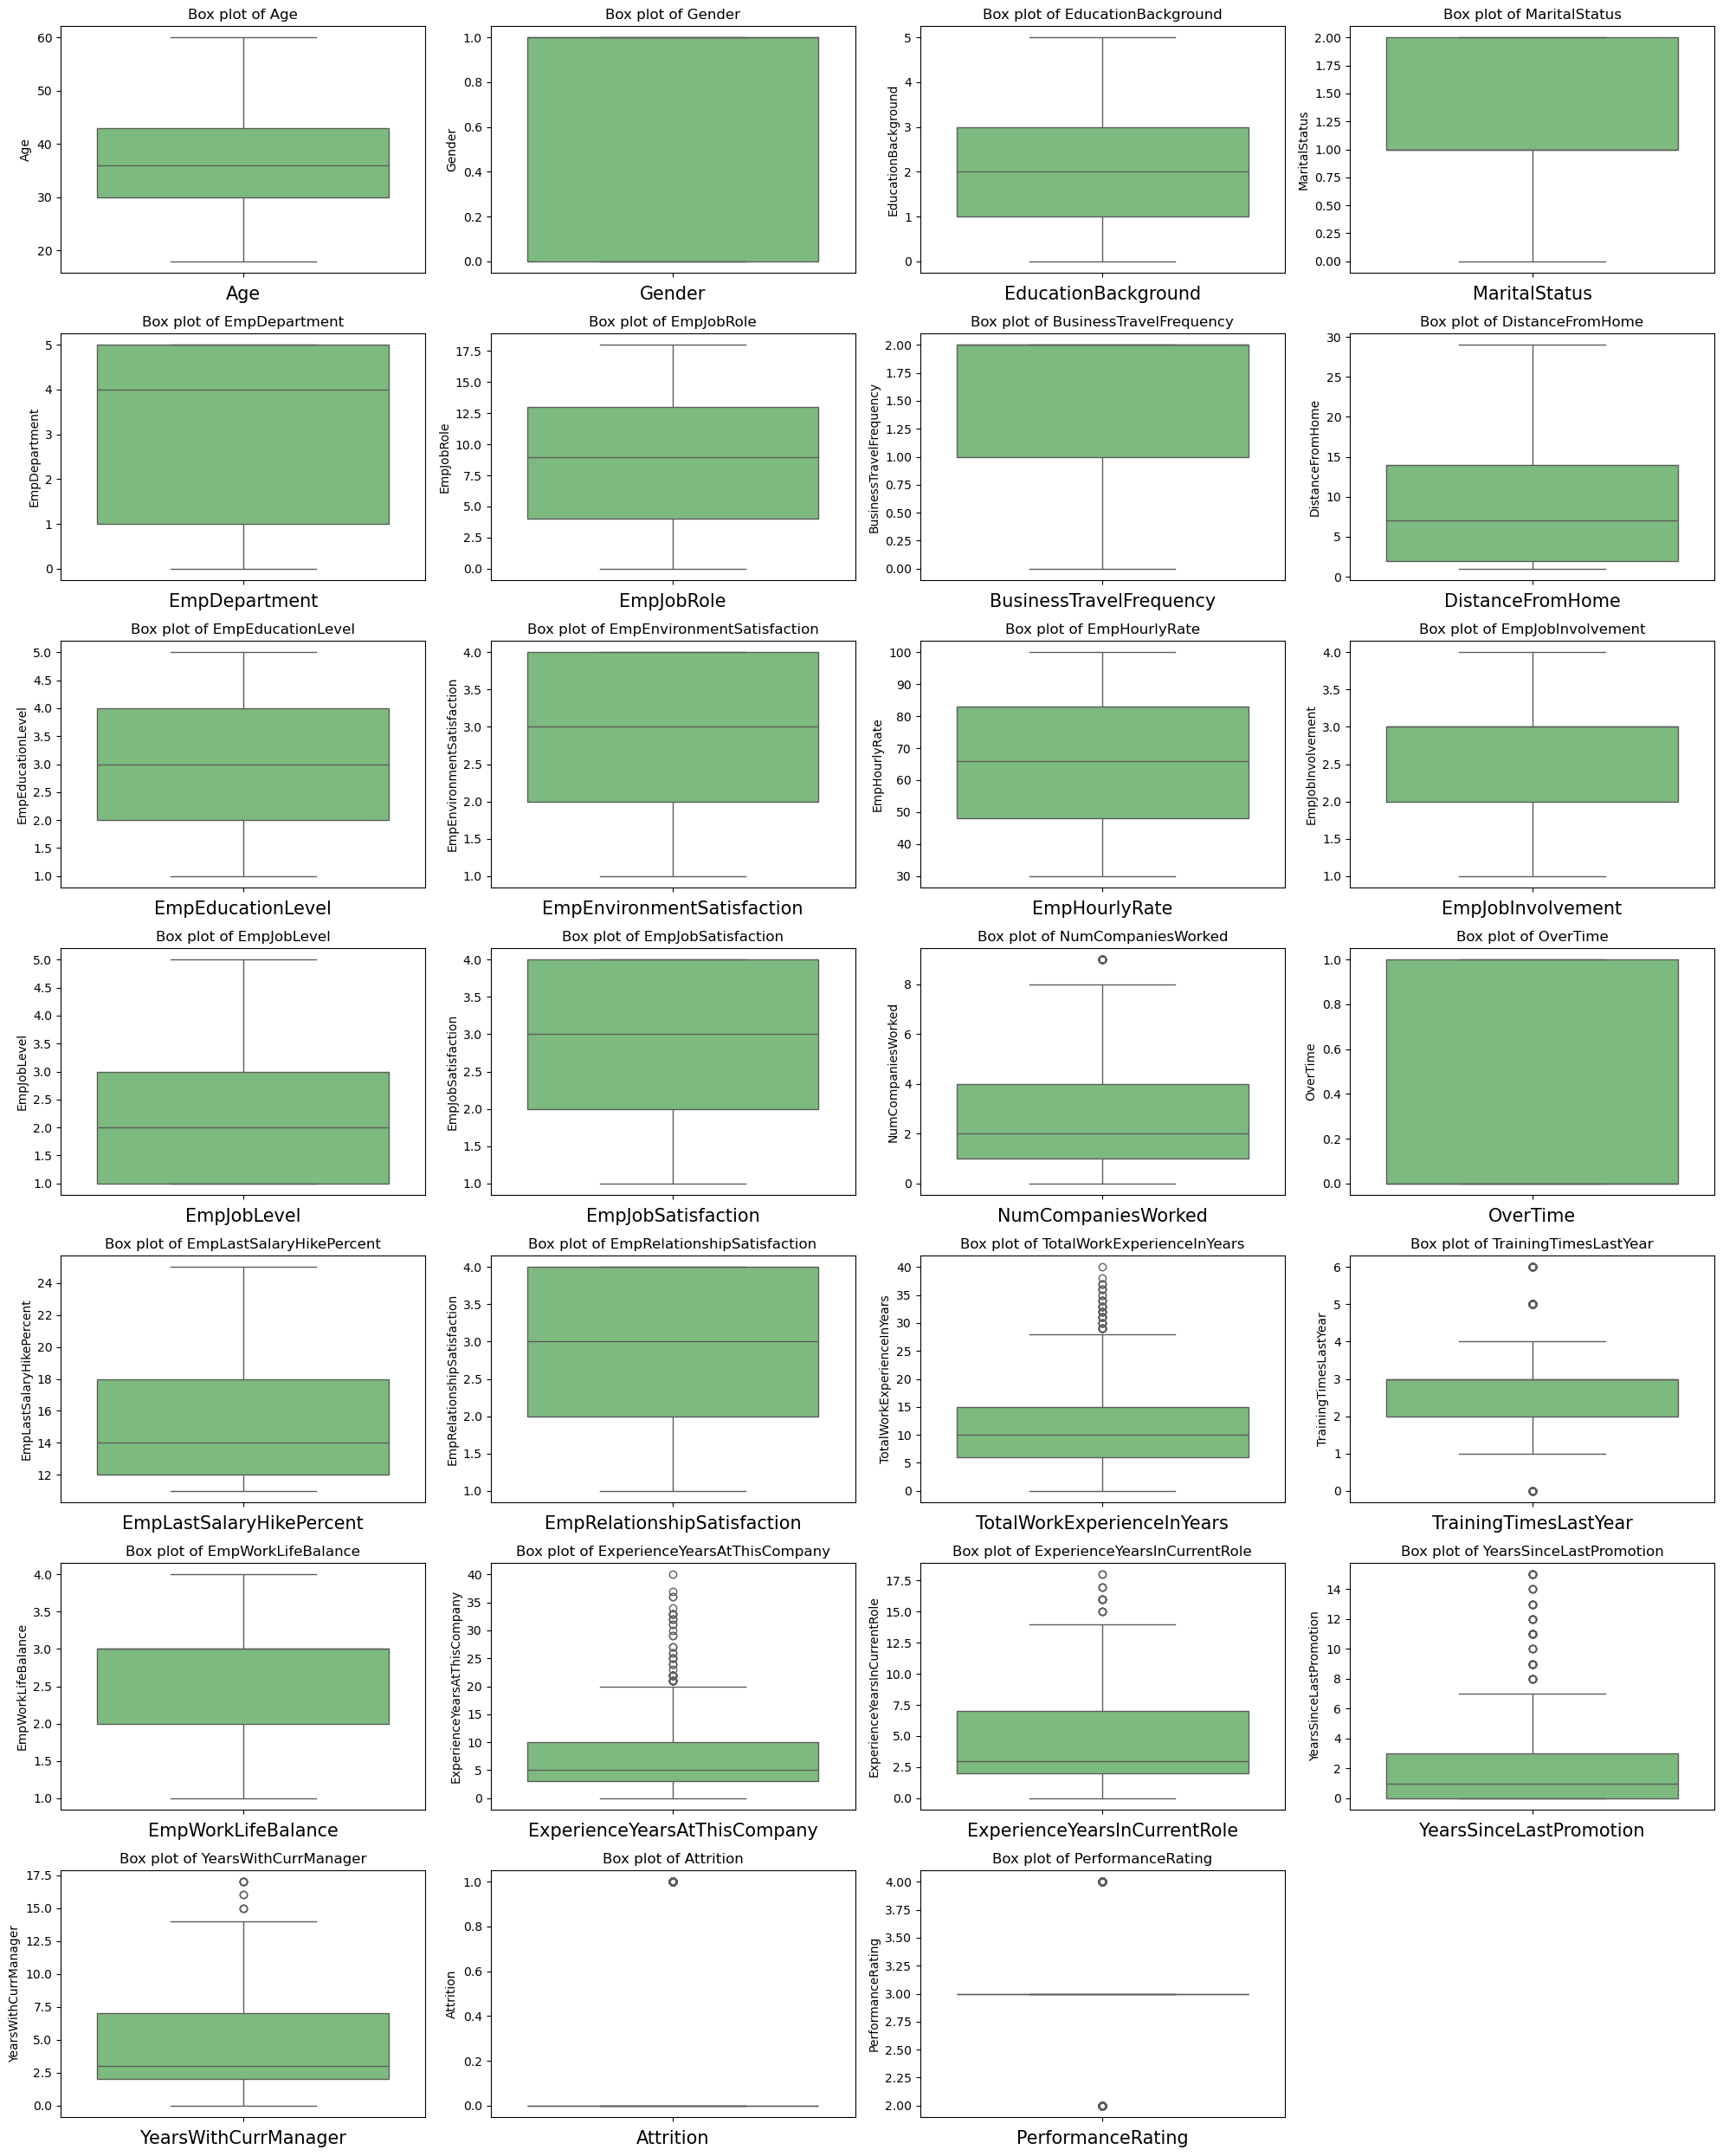

In [90]:
plt.figure(figsize=(20,25))
plotnumber=1
for i in df:
    if plotnumber<28:
        ax=plt.subplot(7,4,plotnumber)
        sns.boxplot(df[i],palette="Greens")
        plt.xlabel(i,fontsize=15)
        plt.title(f'Box plot of {i}')
    plotnumber+=1
plt.tight_layout()
plt.show()

- NumCompaniesWorked : some employees have very high job switches we need to handle outliers
- TotalWorkExperienceInYears : Some employees have very high work experience.
- TrainingTimesLastYear : Employees with 0 or high training counts might indicate company policies or personal growth.
- YearsSinceLastPromotion : employees may have high promotion gap
- ExperienceYearsAtThisCompany : Employees staying for a very long time at company
- ExperienceYearsInCurrentRole : Someemployees have stayed in the same role for too long
- YearsWithCurrManager : Staying under the same manager for too long
- Attrition : no need to handle outliers we will keep for prediction
- PerformanceRating : this is our target variable so we need to keep outliers for predict  high and low performers.

- Here we are use inter quatile range to impute the outlier, becuase data is not normally distributed.
- IQR stand for the interquatile range, When a data set has outliers or extreme values, we summarize a typical value using the median as opposed to the mean. which is the difference between the first and third quartiles

## Apply IQR Method to Handle Outliers

In [94]:
# Define outlier columns
outlier_columns = [
    "NumCompaniesWorked", "TotalWorkExperienceInYears", "TrainingTimesLastYear",
    "YearsSinceLastPromotion", "ExperienceYearsAtThisCompany",
    "ExperienceYearsInCurrentRole", "YearsWithCurrManager"
]

# Compute IQR-based lower and upper limits for all columns
Q1 = df[outlier_columns].quantile(0.25)
Q3 = df[outlier_columns].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Replace outliers with median values
for col in outlier_columns:
    median_value = df[col].median()
    df[col] = df[col].apply(lambda x: median_value if x < lower_limit[col] or x > upper_limit[col] else x)

print("Outliers successfully replaced with median")


Outliers successfully replaced with median


- After handling outliers, we need to check the distribution of numerical columns. If they are highly skewed, we may apply transformations like log transformation, square root, or Box-Cox transformation to make them more normally distributed.

## Checking Boxplot After Handling Outliers

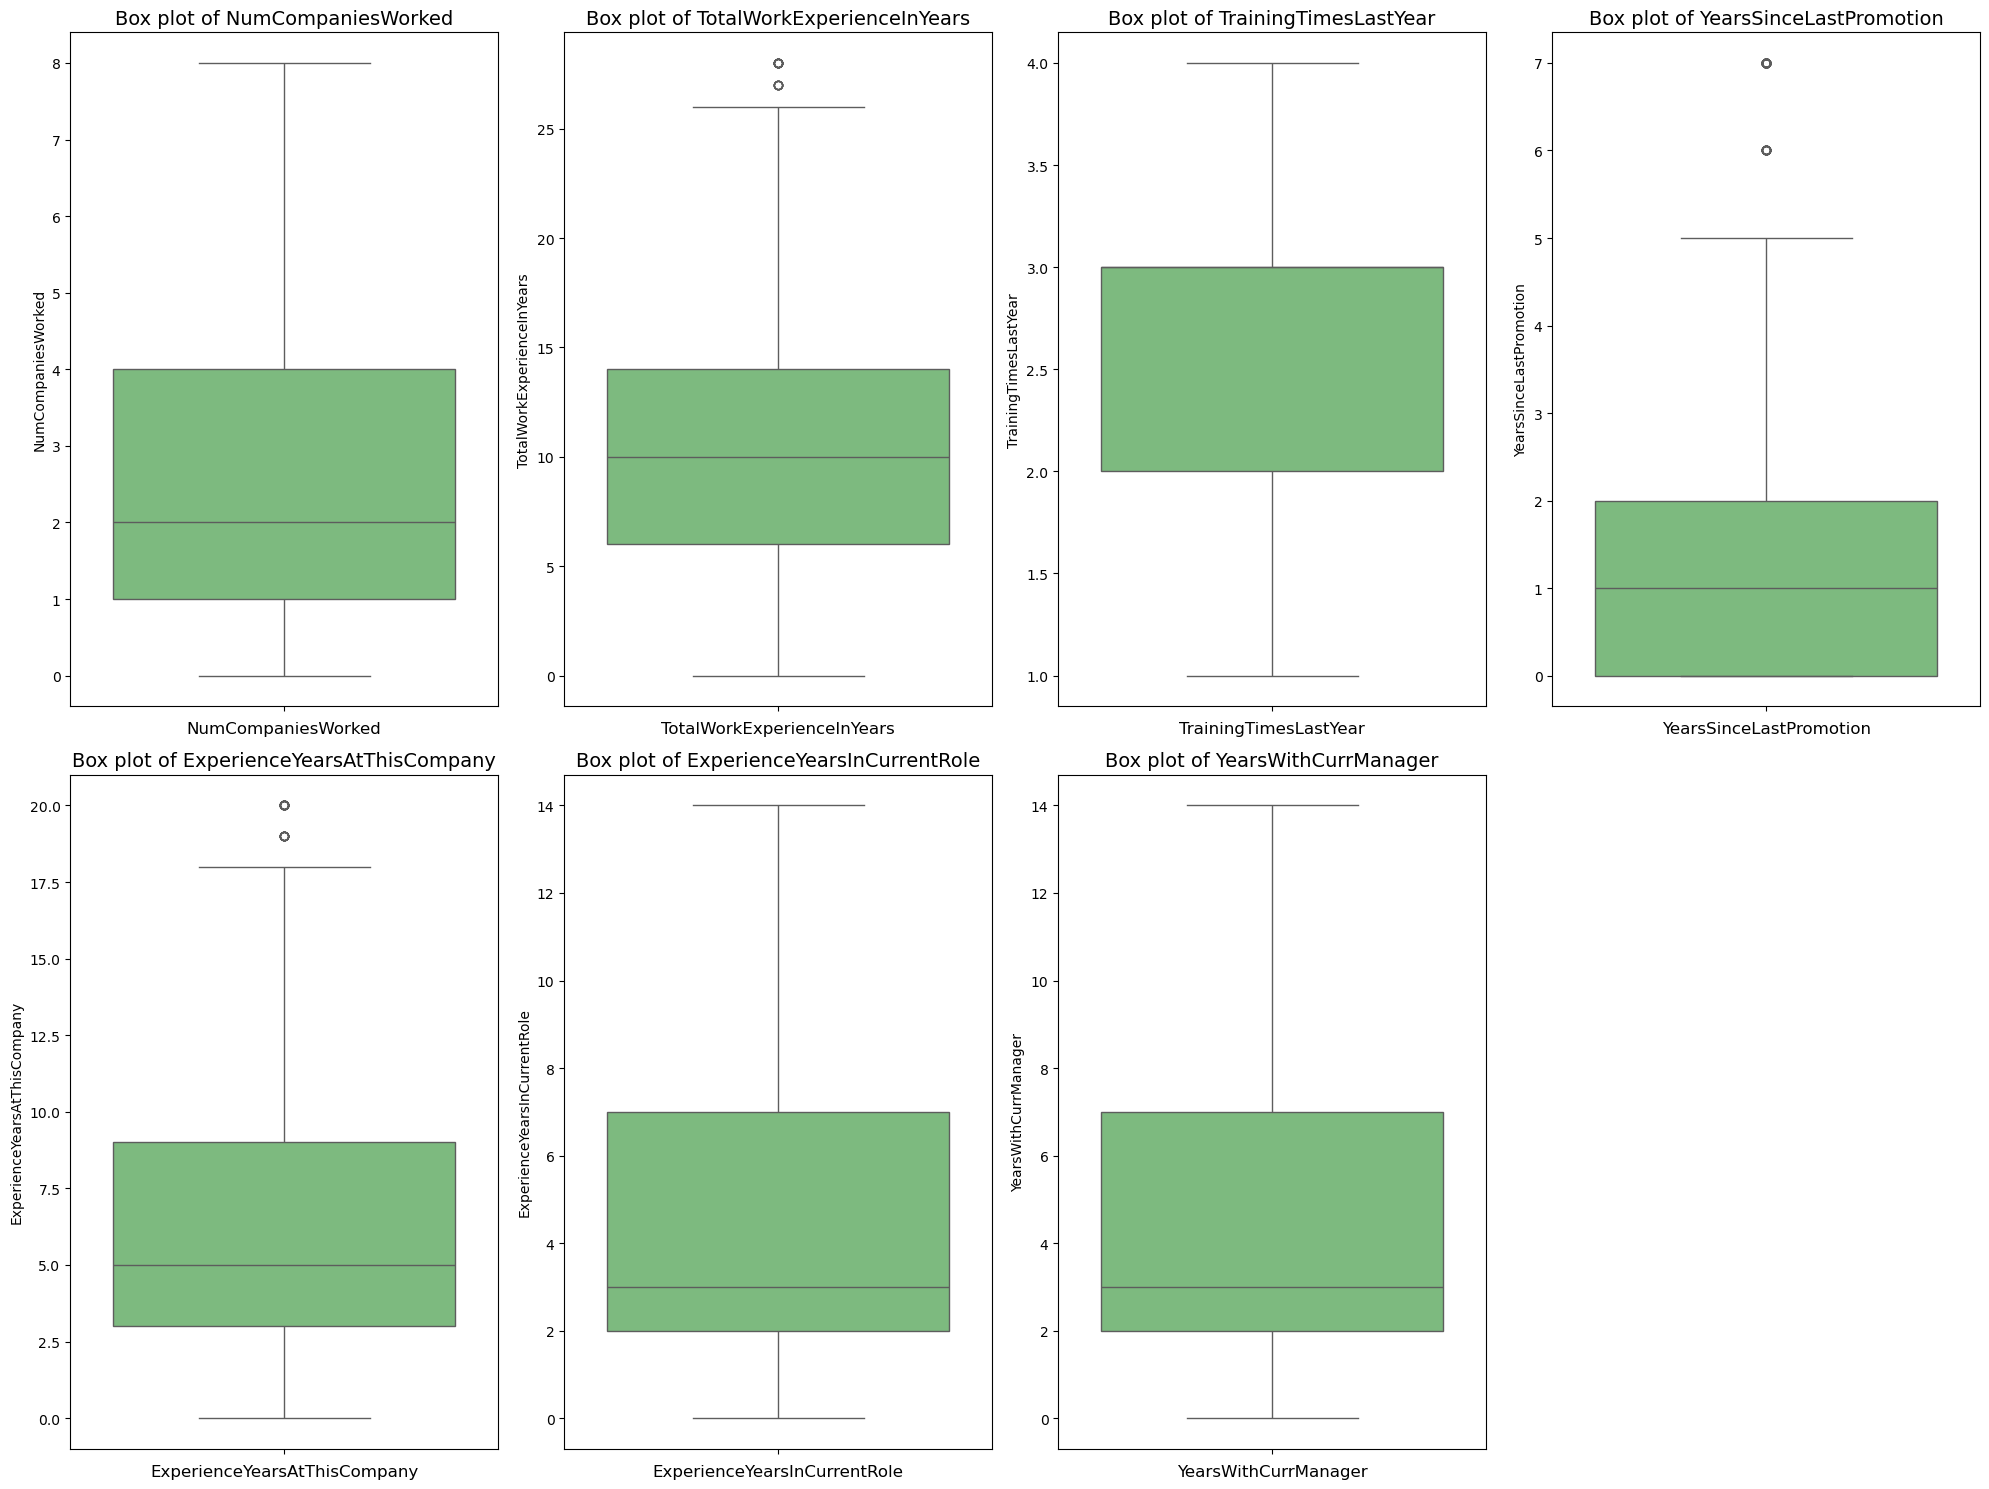

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))  # Adjust figure size
plotnumber = 1

for col in outlier_columns: 
    ax = plt.subplot(2, 4, plotnumber) 
    sns.boxplot(y=df[col], palette="Greens")  
    plt.xlabel(col, fontsize=12)
    plt.title(f'Box plot of {col}', fontsize=14)
    plotnumber += 1

plt.tight_layout()
plt.show()


#### Observation:

- Outlier impute sucessfully, but some feature box plot showing outlier, so we can not impute this outlier.

After handling outliers, we need to check the distribution of the columns. If they are highly skewed, we may apply transformations to make them more normally distributed.

## Handling Skew Data By Transformation Technique

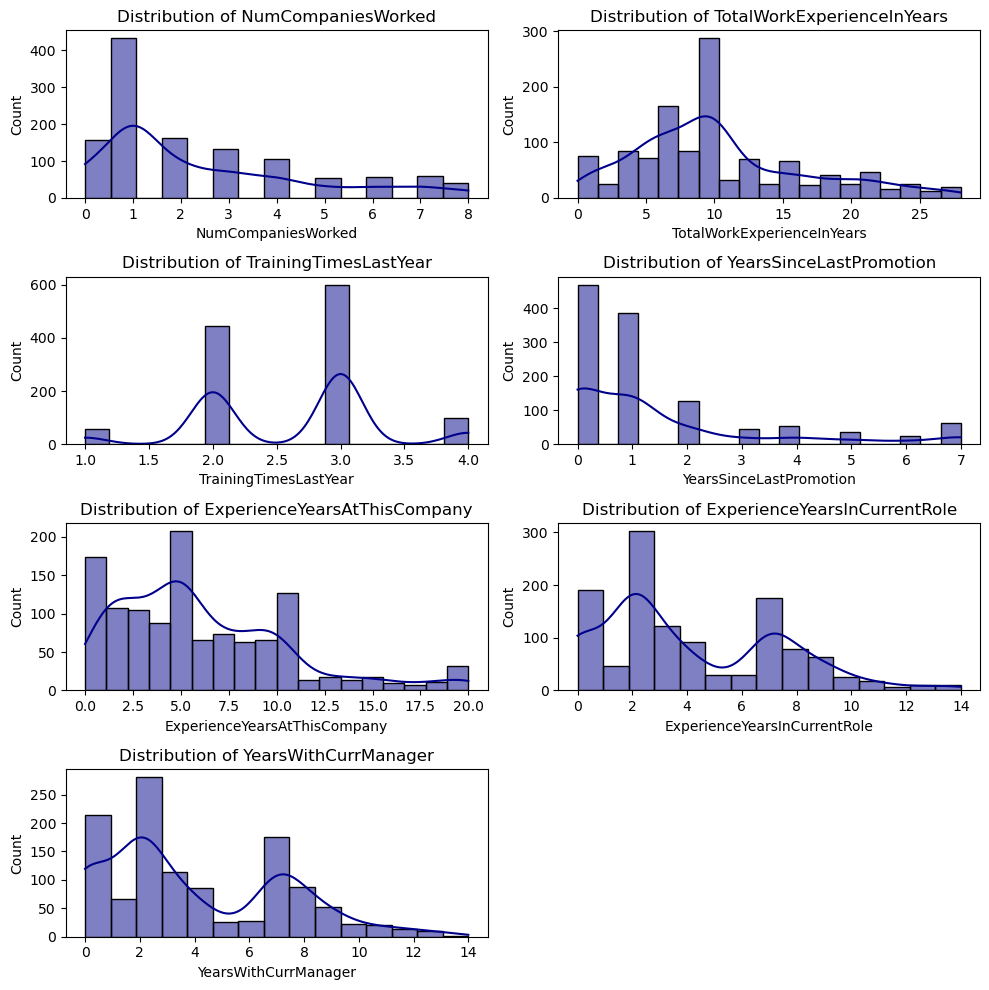

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
plot = 1

# List of columns you want to plot
for i in ['NumCompaniesWorked', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear', 'YearsSinceLastPromotion',
          "ExperienceYearsAtThisCompany", "ExperienceYearsInCurrentRole" ,"YearsWithCurrManager"]:
    if plot < 8:  
        ax = plt.subplot(4, 2, plot) 
        sns.histplot(df[i], kde=True, color='darkblue')
        plt.xlabel(i, fontsize=10)
        plt.title(f'Distribution of {i}')
        plot += 1

plt.tight_layout()
plt.show()

In [102]:
print(df[outlier_columns].skew())

NumCompaniesWorked              1.037701
TotalWorkExperienceInYears      0.800673
TrainingTimesLastYear          -0.118586
YearsSinceLastPromotion         1.666759
ExperienceYearsAtThisCompany    1.087625
ExperienceYearsInCurrentRole    0.667303
YearsWithCurrManager            0.626338
dtype: float64


## From Above Plots and skweness Result 
- NumCompaniesWorked (1.03) → shows Moderate right skew so we use Log transformation for normalize using (np.log1p) 
- YearsSinceLastPromotion (1.67) → highly skewed on right so we use  Box-Cox for normalize we adding 1 to  normalizes its extreme tail.
- ExperienceYearsAtThisCompany (1.09) →  shows Moderate skew so we use Box-Cox to normal the distribution.
- (No transformation needed for TotalWorkExperienceInYears, TrainingTimesLastYear,ExperienceYearsInCurrentRole, and YearsWithCurrManager)

In [104]:
from scipy.stats import boxcox

#For NumCompaniesWorked (skew ≈ 1.03): Use log transformation to reduce right skew.
df["NumCompaniesWorked"] = np.log1p(df["NumCompaniesWorked"])

#For YearsSinceLastPromotion (skew ≈ 1.66): Use Box-Cox transformation.
# Add 1 to avoid issues with zero values.
df["YearsSinceLastPromotion"] = df["YearsSinceLastPromotion"] + 1
df["YearsSinceLastPromotion"], _ = boxcox(df["YearsSinceLastPromotion"])

#For ExperienceYearsAtThisCompany (skew ≈ 1.09): Use Box-Cox transformation.
df["ExperienceYearsAtThisCompany"] = df["ExperienceYearsAtThisCompany"] + 1
df["ExperienceYearsAtThisCompany"], _ = boxcox(df["ExperienceYearsAtThisCompany"])


In [105]:
# Check skewness values after transformation
print("Skewness after transformation:")
print(df[["NumCompaniesWorked", "YearsSinceLastPromotion", "ExperienceYearsAtThisCompany"]].skew())

Skewness after transformation:
NumCompaniesWorked              0.073912
YearsSinceLastPromotion         0.165206
ExperienceYearsAtThisCompany   -0.028434
dtype: float64


## After Trasformation Result

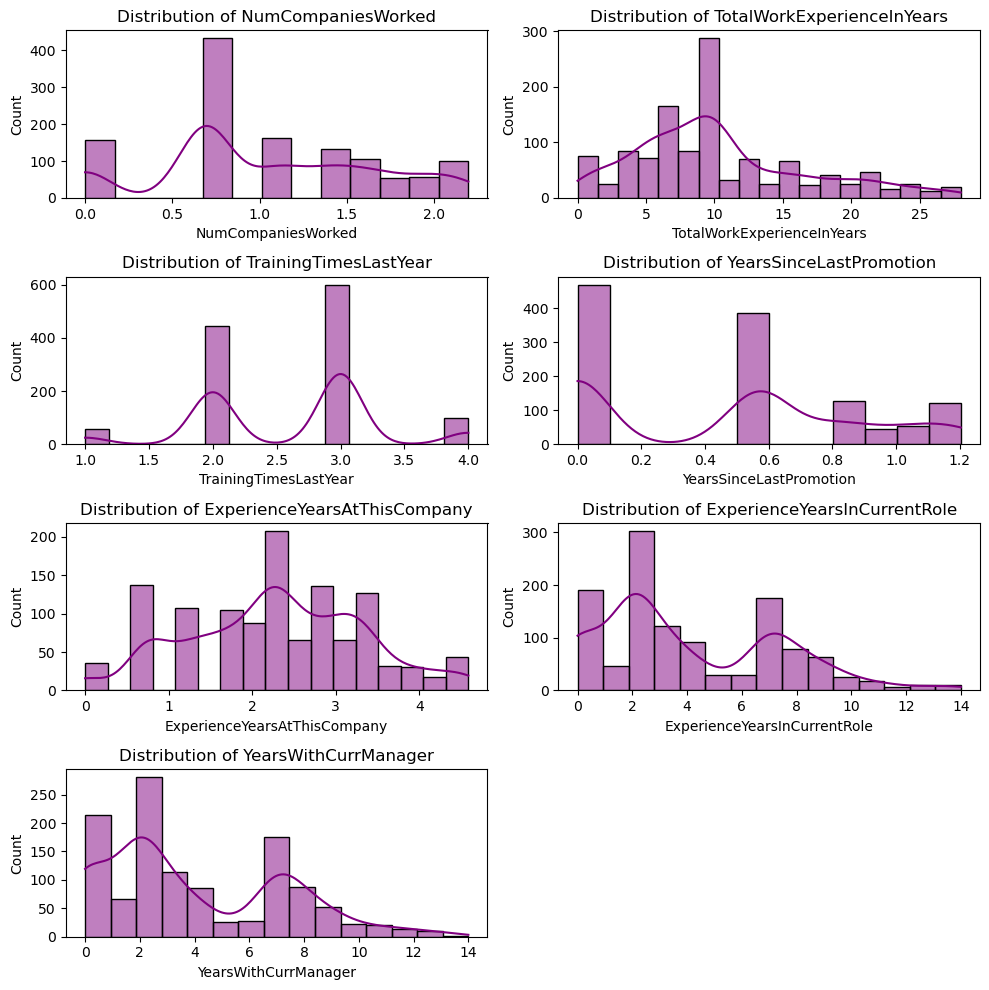

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
plot = 1

# List of columns you want to plot
for i in ['NumCompaniesWorked', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear', 'YearsSinceLastPromotion',
          "ExperienceYearsAtThisCompany", "ExperienceYearsInCurrentRole" ,"YearsWithCurrManager"]:
    if plot < 8:  
        ax = plt.subplot(4, 2, plot) 
        sns.histplot(df[i], kde=True, color='purple')
        plt.xlabel(i, fontsize=10)
        plt.title(f'Distribution of {i}')
        plot += 1

plt.tight_layout()
plt.show()

#### NumCompaniesWorked:
- The original data had a long right tail (many employees with low values and a few with very high values). By applying a log transformation (using np.log1p), we compress those high values so the distribution becomes more balanced and easier for our model to learn from.
#### YearsSinceLastPromotion:
- This column was highly skewed, meaning most employees had very low values (promoted recently), but a few had very high values (not promoted for a long time). Using Box‑Cox transformation (after adding 1) adjusts these extreme values to a more normal-like distribution, which helps in reducing their skweness.
#### ExperienceYearsAtThisCompany:
ExperienceYearsAtThisCompany:
Similarly, this column had moderate skewness. Applying Box‑Cox transformation helps to even out the distribution, ensuring that employees with very long tenure don't disproportionately affect our predictions.

# Feature Engineering
### Correlation Analysis & Feature Selection

In [110]:
df.corr()

Age    Gender  EducationBackground  \
Age                           1.000000 -0.040107            -0.055905   
Gender                       -0.040107  1.000000             0.009922   
EducationBackground          -0.055905  0.009922             1.000000   
MaritalStatus                -0.098368 -0.042169            -0.001097   
EmpDepartment                -0.000104 -0.010925            -0.026874   
EmpJobRole                   -0.037665  0.011332            -0.012325   
BusinessTravelFrequency       0.040579 -0.043608             0.012382   
DistanceFromHome              0.020937 -0.001507            -0.013919   
EmpEducationLevel             0.207313 -0.022960            -0.047978   
EmpEnvironmentSatisfaction    0.013814  0.000033             0.045028   
EmpHourlyRate                 0.062867  0.002218            -0.030234   
EmpJobInvolvement             0.027216  0.010949            -0.025505   
EmpJobLevel                   0.509139 -0.050685            -0.056338   
EmpJobSatisfaction           -0.002436  0.024680            -0.030977   
NumCompaniesWorked            0.320868 -0.046071            -0.024764   
OverTime                      0.051910 -0.038410             0.007046   
EmpLastSalaryHikePercent     -0.006105 -0.005319            -0.009788   
EmpRelationshipSatisfaction   0.049749  0.030707             0.005652   
TotalWorkExperienceInYears    0.559662 -0.060534            -0.016705   
TrainingTimesLastYear         0.025680 -0.033224             0.019820   
EmpWorkLifeBalance           -0.019563  0.015793             0.022890   
ExperienceYearsAtThisCompany  0.184686 -0.049522             0.018538   
ExperienceYearsInCurrentRole  0.185951 -0.023985             0.007309   
YearsSinceLastPromotion       0.138084 -0.017596             0.011115   
YearsWithCurrManager          0.187042 -0.039737             0.001657   
Attrition                    -0.189317  0.035758             0.027161   
PerformanceRating            -0.040164 -0.001780             0.005607   

                              MaritalStatus  EmpDepartment  EmpJobRole  \
Age                               -0.098368      -0.000104   -0.037665   
Gender                            -0.042169      -0.010925    0.011332   
EducationBackground               -0.001097      -0.026874   -0.012325   
MaritalStatus                      1.000000       0.067272    0.038023   
EmpDepartment                      0.067272       1.000000    0.568973   
EmpJobRole                         0.038023       0.568973    1.000000   
BusinessTravelFrequency            0.028520      -0.045233   -0.086251   
DistanceFromHome                  -0.019148       0.007707    0.022939   
EmpEducationLevel                  0.026737       0.019175   -0.016792   
EmpEnvironmentSatisfaction        -0.032467      -0.019237    0.044612   
EmpHourlyRate                     -0.013540       0.003957   -0.016179   
EmpJobInvolvement                 -0.043355      -0.076988   -0.008034   
EmpJobLevel                       -0.087359       0.100526    0.004406   
EmpJobSatisfaction                 0.044593       0.007150    0.032916   
NumCompaniesWorked                -0.047534      -0.008389   -0.004563   
OverTime                          -0.022833      -0.026841    0.015075   
EmpLastSalaryHikePercent           0.010128      -0.012661    0.005735   
EmpRelationshipSatisfaction        0.026410      -0.050286   -0.043067   
TotalWorkExperienceInYears        -0.096627       0.011727   -0.017979   
TrainingTimesLastYear              0.000601       0.038269    0.008986   
EmpWorkLifeBalance                 0.014154       0.068875   -0.007519   
ExperienceYearsAtThisCompany      -0.072224       0.067339    0.034984   
ExperienceYearsInCurrentRole      -0.067115       0.068314    0.034071   
YearsSinceLastPromotion           -0.016819       0.036103    0.025115   
YearsWithCurrManager              -0.065892       0.047389    0.017096   
Attrition                          0.162969       0.048006    0.03

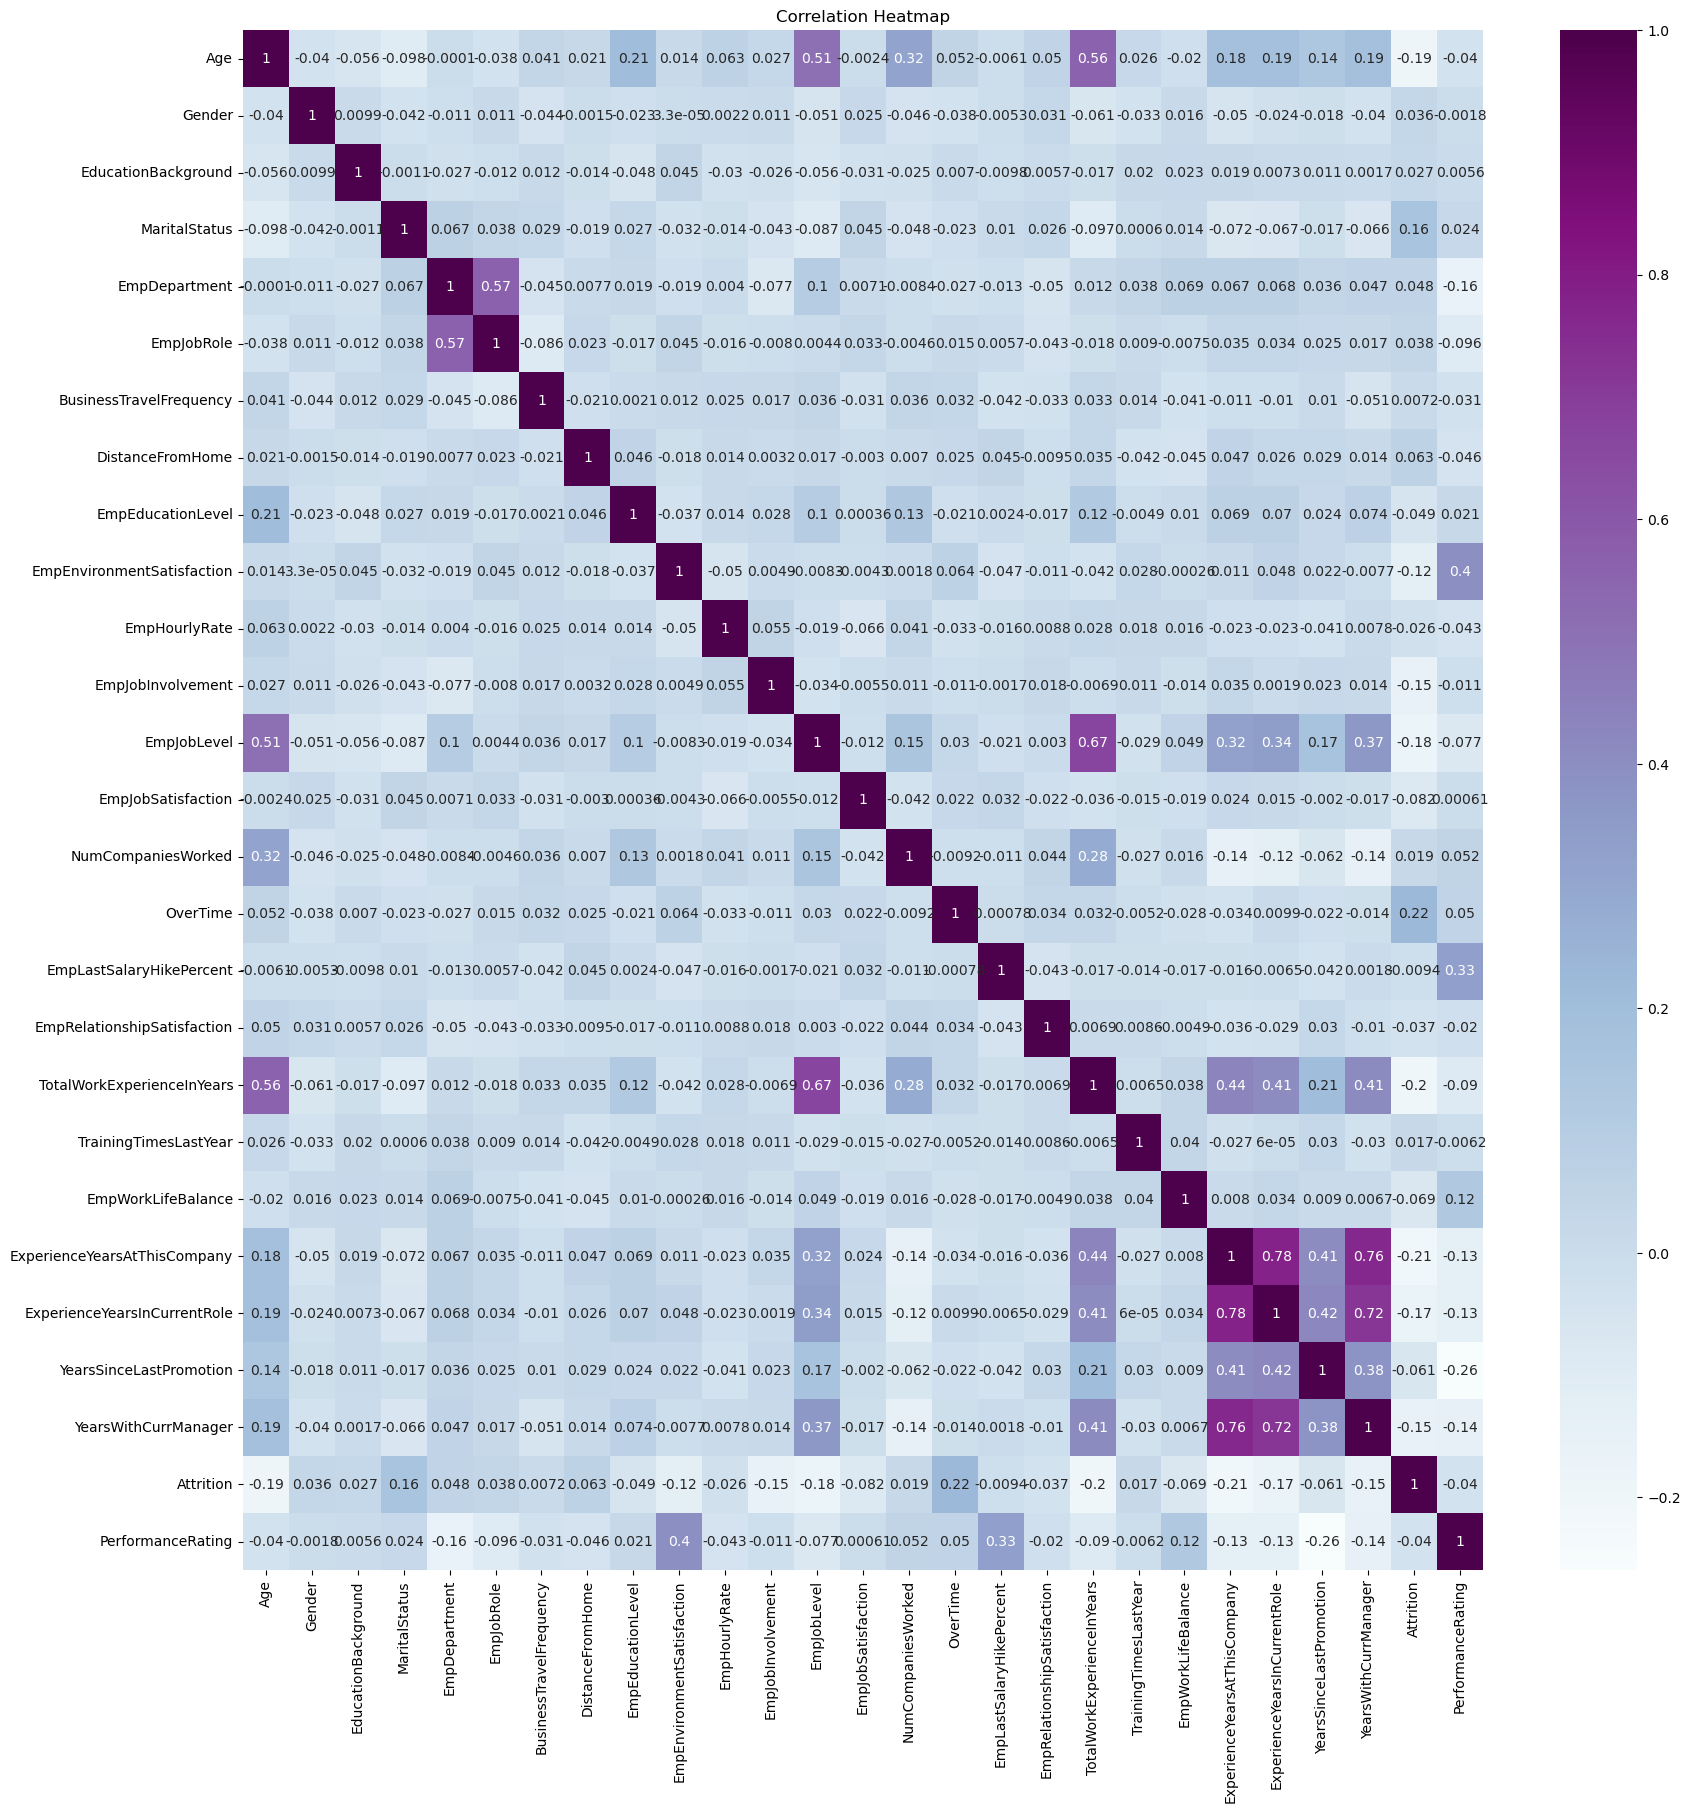

In [111]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap="BuPu")
plt.title("Correlation Heatmap")
plt.show()

### Above Heatmap
- From above heatmap we are clearly seen the their is no highly correlated feature in data.
- But We remove columns like Age, Gender, EducationBackground, MaritalStatus, and others that have near-zero correlation with performance. They will add complexity without improving prediction, and Attrition will drop because it's a separate outcome. 

## Identifying Key Factors Influencing Employee Performance with Correlation > 0.1

In [114]:
import pandas as pd

# Compute the correlation matrix
corr_matrix = df.corr()

# Select correlations with 'Performance Rating'
performance_corr = corr_matrix["PerformanceRating"]

# Filter features with absolute correlation greater than 0.1
important_features = performance_corr[performance_corr.abs() > 0.1]

# Display the selected columns
print("Selected Features with Correlation > 0.1:\n")
print(important_features)

Selected Features with Correlation > 0.1:

EmpDepartment                  -0.162615
EmpEnvironmentSatisfaction      0.395561
EmpLastSalaryHikePercent        0.333722
EmpWorkLifeBalance              0.124429
ExperienceYearsAtThisCompany   -0.133493
ExperienceYearsInCurrentRole   -0.132773
YearsSinceLastPromotion        -0.259328
YearsWithCurrManager           -0.139947
PerformanceRating               1.000000
Name: PerformanceRating, dtype: float64


- These features are more relevant for performance prediction, for focus on the most impactful variables. They have a moderate to strong correlation with PerformanceRating.

#### EmpJobRole
Specific roles (like Manager or Sales Executive) have different performance criteria, so it’s important even with a moderate correlation.
#### OverTime 
Overtime can affect stress levels and work-life balance, so we keep it 

### Now we select Only required features for prediction 

In [261]:
# List of important columns
x = df[[
    'EmpDepartment', 'EmpJobRole', 'EmpEnvironmentSatisfaction', 
    'EmpLastSalaryHikePercent', 'EmpWorkLifeBalance', 
    'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 
    'YearsSinceLastPromotion', 'YearsWithCurrManager','OverTime'
]]

y = df['PerformanceRating']  # Target column


In [263]:
x.head()

EmpDepartment  EmpJobRole  EmpEnvironmentSatisfaction  \
0              5          13                           4   
1              5          13                           4   
2              5          13                           4   
3              3           8                           2   
4              5          13                           1   

   EmpLastSalaryHikePercent  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                        12                   2                      3.298086   
1                        12                   3                      2.736734   
2                        21                   3                      4.373518   
3                        15                   2                      2.267091   
4                        14                   3                      1.266548   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                           7.0                 0.000000   
1                           7.0                 0.569813   
2                          13.0                 0.569813   
3                           6.0                 0.569813   
4                           2.0                 0.810429   

   YearsWithCurrManager  OverTime  
0                   8.0         0  
1                   7.0         0  
2                  12.0         1  
3                   6.0         0  
4                   2.0         0

- Age: Dropped because age shows almost no relationship with performance.
- Gender: Dropped since gender has negligible impact on performance prediction.
- EducationBackground: Dropped because it adds little predictive value compared to more specific education measures.
- MaritalStatus: Dropped due to very low correlation with performance.
- BusinessTravelFrequency: Dropped because travel frequency doesn’t significantly affect performance.
- DistanceFromHome: Dropped since commuting distance has minimal influence on performance.
- EmpEducationLevel: Dropped because its correlation with performance is very low.
- EmpHourlyRate: Dropped as pay rate does not predict performance effectively.
- EmpJobInvolvement: Dropped because it shows almost no impact on performance ratings.
- EmpJobSatisfaction: Dropped due to minimal contribution to performance prediction.
- NumCompaniesWorked: Dropped because job-hopping frequency has very low predictive power.
- TotalWorkExperienceInYears: Dropped since overall experience is less specific and weakly correlated.
- TrainingTimesLastYear: Dropped because training frequency does not impact performance significantly.
- Attrition: Dropped because it’s a separate outcome, not a predictor of performance.

#### By focuing only on Imp features, we’re keeping the data that has meaningful impact on performance, reducing noise and model complexity.


## Split the Data

In [123]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2 , random_state = 42 )

## Scalling for data

In [125]:
# Standardization technique is used
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [126]:
x_train.shape, x_test.shape

((960, 10), (240, 10))

# Model Creation

## 1. Logistic Regression

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

log_reg = LogisticRegression(random_state=42)  # Create Logistic Regression object
log_reg.fit(x_train, y_train)

# Make predictions on test and training sets
y_pred_test_lr = log_reg.predict(x_test)
y_pred_train_lr = log_reg.predict(x_train)

# Evaluate performance
print("Logistic Regression - Training Accuracy:", accuracy_score(y_train, y_pred_train_lr))
print("Logistic Regression - Testing Accuracy:", accuracy_score(y_test, y_pred_test_lr))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_test_lr))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test_lr))


Logistic Regression - Training Accuracy: 0.8520833333333333
Logistic Regression - Testing Accuracy: 0.8916666666666667
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           2       0.71      0.69      0.70        29
           3       0.91      0.95      0.93       184
           4       0.95      0.70      0.81        27

    accuracy                           0.89       240
   macro avg       0.86      0.78      0.81       240
weighted avg       0.89      0.89      0.89       240

Logistic Regression Confusion Matrix:
 [[ 20   9   0]
 [  8 175   1]
 [  0   8  19]]


## Insight
- Training Accuracy: 85.2%
- Testing Accuracy: 89.1%
- The model is performing well on both training and testing data.
- It gives balanced performance, meaning no overfitting.
- Struggles slightly with classifying Performance Rating = 2 and 4 (lower recall).
- Best for balanced datasets but might not be the strongest model here we will see another model

## Support Vector Classifier (SVC)

In [132]:
from sklearn.svm import SVC

# Initialize and train Support Vector Classifier
svc = SVC(kernel='linear', random_state=42)
svc.fit(x_train, y_train)

# Make predictions
y_pred_train_svc = svc.predict(x_train)
y_pred_test_svc = svc.predict(x_test)

# Evaluate performance
print("SVC - Training Accuracy:", accuracy_score(y_train, y_pred_train_svc))
print("SVC - Testing Accuracy:", accuracy_score(y_test, y_pred_test_svc))
print("SVC Classification Report:\n", classification_report(y_test, y_pred_test_svc))
print("SVC Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test_svc))


SVC - Training Accuracy: 0.85
SVC - Testing Accuracy: 0.8916666666666667
SVC Classification Report:
               precision    recall  f1-score   support

           2       0.74      0.69      0.71        29
           3       0.91      0.96      0.93       184
           4       0.95      0.67      0.78        27

    accuracy                           0.89       240
   macro avg       0.87      0.77      0.81       240
weighted avg       0.89      0.89      0.89       240

SVC Confusion Matrix:
 [[ 20   9   0]
 [  7 176   1]
 [  0   9  18]]


## Insight
- TrainingAccuracy: 85.0%
- Testing Accuracy: 89.1%
- Similar performance to Logistic Regression.
- Handles class 3 very well.
Class 4 has the lowest recall, meaning it struggles to identify those cases correctly.
Performs well but we will check another model

### RANDOM FOREST CLASSIFIER

In [135]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

# Make predictions
y_pred_train_rf = rf.predict(x_train)
y_pred_test_rf = rf.predict(x_test)

# Evaluate performance
print("Random Forest - Training Accuracy:", accuracy_score(y_train, y_pred_train_rf))
print("Random Forest - Testing Accuracy:", accuracy_score(y_test, y_pred_test_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_test_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test_rf))


Random Forest - Training Accuracy: 1.0
Random Forest - Testing Accuracy: 0.9416666666666667
Random Forest Classification Report:
               precision    recall  f1-score   support

           2       0.93      0.90      0.91        29
           3       0.94      0.98      0.96       184
           4       0.95      0.70      0.81        27

    accuracy                           0.94       240
   macro avg       0.94      0.86      0.89       240
weighted avg       0.94      0.94      0.94       240

Random Forest Confusion Matrix:
 [[ 26   3   0]
 [  2 181   1]
 [  0   8  19]]


## Insight
- Training Accuracy: 100%
- Testing Accuracy: 94.1%
- Overfitting issue since training accuracy is 100%.
- Performs well on all classes, but class 4 has lower recall.
- High accuracy, but overfitting we need to reduce

## ANN [MLP Classifier]

In [138]:
from sklearn.neural_network import MLPClassifier

# Initialize and train MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp.fit(x_train, y_train)

# Make predictions
y_pred_train_mlp = mlp.predict(x_train)
y_pred_test_mlp = mlp.predict(x_test)

# Evaluate performance
print("MLP Classifier - Training Accuracy:", accuracy_score(y_train, y_pred_train_mlp))
print("MLP Classifier - Testing Accuracy:", accuracy_score(y_test, y_pred_test_mlp))
print("MLP Classifier Classification Report:\n", classification_report(y_test, y_pred_test_mlp))
print("MLP Classifier Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test_mlp))


MLP Classifier - Training Accuracy: 0.9729166666666667
MLP Classifier - Testing Accuracy: 0.9083333333333333
MLP Classifier Classification Report:
               precision    recall  f1-score   support

           2       0.81      0.76      0.79        29
           3       0.92      0.97      0.94       184
           4       0.90      0.67      0.77        27

    accuracy                           0.91       240
   macro avg       0.88      0.80      0.83       240
weighted avg       0.91      0.91      0.91       240

MLP Classifier Confusion Matrix:
 [[ 22   7   0]
 [  4 178   2]
 [  1   8  18]]


# Insight
- Training Accuracy: 97.3%
- Testing Accuracy: 90.8%
- Works well, but class 4 has lower recall.
- Better than SVC and Logistic Regression but slightly overfits.

## K-NEAREST NEIGHBORS (KNN) CLASSIFIER

In [141]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Using 5 neighbors (default)
knn.fit(x_train, y_train)

# Make predictions
y_pred_train_knn = knn.predict(x_train)
y_pred_test_knn = knn.predict(x_test)

# Evaluate performance
print("KNN Classifier - Training Accuracy:", accuracy_score(y_train, y_pred_train_knn))
print("KNN Classifier - Testing Accuracy:", accuracy_score(y_test, y_pred_test_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_test_knn))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test_knn))


KNN Classifier - Training Accuracy: 0.8916666666666667
KNN Classifier - Testing Accuracy: 0.8916666666666667
KNN Classification Report:
               precision    recall  f1-score   support

           2       0.82      0.79      0.81        29
           3       0.91      0.96      0.93       184
           4       0.82      0.52      0.64        27

    accuracy                           0.89       240
   macro avg       0.85      0.76      0.79       240
weighted avg       0.89      0.89      0.89       240

KNN Confusion Matrix:
 [[ 23   6   0]
 [  4 177   3]
 [  1  12  14]]


## Insight
- Training Accuracy: 89.1%
- Testing Accuracy: 89.1%
- This model shows Balanced but struggles with class 4 (low recall).
- we will see another model

## Decision Tree Classifier

In [144]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)

# Make predictions
y_pred_train_dt = dt.predict(x_train)
y_pred_test_dt = dt.predict(x_test)

# Evaluate performance
print("Decision Tree - Training Accuracy:", accuracy_score(y_train, y_pred_train_dt))
print("Decision Tree - Testing Accuracy:", accuracy_score(y_test, y_pred_test_dt))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_test_dt))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test_dt))


Decision Tree - Training Accuracy: 1.0
Decision Tree - Testing Accuracy: 0.9
Decision Tree Classification Report:
               precision    recall  f1-score   support

           2       0.77      0.93      0.84        29
           3       0.95      0.92      0.93       184
           4       0.74      0.74      0.74        27

    accuracy                           0.90       240
   macro avg       0.82      0.86      0.84       240
weighted avg       0.90      0.90      0.90       240

Decision Tree Confusion Matrix:
 [[ 27   2   0]
 [  8 169   7]
 [  0   7  20]]


# Insight
- Training Accuracy: 100%
- Testing Accuracy: 90.0%
- this model gives overfitting training accuracy slighly more than testing 
- handles class 2 we but class 4 has moderately low 

## Naive Bayes Bernoulli

In [147]:
from sklearn.naive_bayes import BernoulliNB

# Initialize and train Naive Bayes Bernoulli Classifier
nb = BernoulliNB()
nb.fit(x_train, y_train)

# Make predictions
y_pred_train_nb = nb.predict(x_train)
y_pred_test_nb = nb.predict(x_test)

# Evaluate performance
print("Naive Bayes Bernoulli - Training Accuracy:", accuracy_score(y_train, y_pred_train_nb))
print("Naive Bayes Bernoulli - Testing Accuracy:", accuracy_score(y_test, y_pred_test_nb))
print("Naive Bayes Bernoulli Classification Report:\n", classification_report(y_test, y_pred_test_nb))
print("Naive Bayes Bernoulli Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test_nb))


Naive Bayes Bernoulli - Training Accuracy: 0.8052083333333333
Naive Bayes Bernoulli - Testing Accuracy: 0.8083333333333333
Naive Bayes Bernoulli Classification Report:
               precision    recall  f1-score   support

           2       0.66      0.72      0.69        29
           3       0.83      0.94      0.88       184
           4       0.00      0.00      0.00        27

    accuracy                           0.81       240
   macro avg       0.50      0.55      0.52       240
weighted avg       0.72      0.81      0.76       240

Naive Bayes Bernoulli Confusion Matrix:
 [[ 21   8   0]
 [ 11 173   0]
 [  0  27   0]]


## Insight
- Training Accuracy: 80.5%
- Testing Accuracy: 80.8%
- erforms poorly on class 4 (recall = 0%).
- worst model for this dataset. 
- Not a good choice since it fails on class 4 entirely.

## Gradient Boosting Classifier

In [150]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(x_train, y_train)

# Make predictions
y_pred_train_gb = gb.predict(x_train)
y_pred_test_gb = gb.predict(x_test)

# Evaluate performance
print("Gradient Boosting - Training Accuracy:", accuracy_score(y_train, y_pred_train_gb))
print("Gradient Boosting - Testing Accuracy:", accuracy_score(y_test, y_pred_test_gb))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_test_gb))
print("Gradient Boosting Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test_gb))


Gradient Boosting - Training Accuracy: 0.9791666666666666
Gradient Boosting - Testing Accuracy: 0.9375
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           2       0.93      0.86      0.89        29
           3       0.94      0.98      0.96       184
           4       0.91      0.74      0.82        27

    accuracy                           0.94       240
   macro avg       0.93      0.86      0.89       240
weighted avg       0.94      0.94      0.94       240

Gradient Boosting Confusion Matrix:
 [[ 25   4   0]
 [  2 180   2]
 [  0   7  20]]


## Insight
- Training Accuracy: 97.9%
- Testing Accuracy: 93.8%
- Strong model with balanced performance.
- Handles all classes well, with minor recall issues for class 4.
- Slight overfitting but better generalization than Random Forest.

## Create a DataFrame for Training And testing model comparison

In [153]:
# Model Performance Data
models = ["Logistic Regression", "SVC", "Random Forest", "MLP Classifier", "KNN", "Decision Tree", "Naive Bayes Bernoulli", "Gradient Boosting"]
train_acc = [0.852, 0.85, 1.0, 0.973, 0.892, 1.0, 0.805, 0.979]
test_acc = [0.892, 0.892, 0.942, 0.908, 0.892, 0.9, 0.808, 0.938]

In [154]:
# Create DataFrame
comparison_df = pd.DataFrame({
    "Model": models,
    "Training Accuracy": train_acc,
    "Testing Accuracy": test_acc
})

In [155]:
# Display DataFrame
print("Model Performance Comparison")
print(comparison_df)

Model Performance Comparison
                   Model  Training Accuracy  Testing Accuracy
0    Logistic Regression              0.852             0.892
1                    SVC              0.850             0.892
2          Random Forest              1.000             0.942
3         MLP Classifier              0.973             0.908
4                    KNN              0.892             0.892
5          Decision Tree              1.000             0.900
6  Naive Bayes Bernoulli              0.805             0.808
7      Gradient Boosting              0.979             0.938


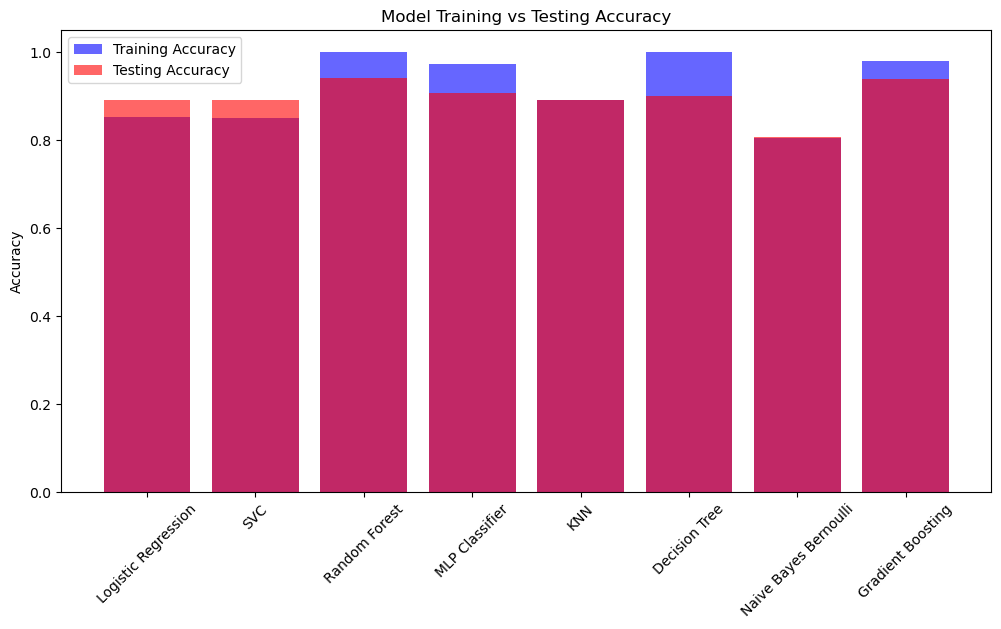

In [156]:
# Plotting Accuracy Comparison
plt.figure(figsize=(12,6))
plt.bar(models, train_acc, color='blue', alpha=0.6, label='Training Accuracy')
plt.bar(models, test_acc, color='red', alpha=0.6, label='Testing Accuracy')
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Model Training vs Testing Accuracy")
plt.legend()
plt.show()

# Choosing Best Model

#### Both models have high testing accuracy (94.2% for Random Forest and 93.7% for Gradient Boosting), making them reliable.
#### Random Forest has 100% training accuracy, meaning it overfits the data, while Gradient Boosting has 97.9%, showing better generalization 
#### Handles all classes well, with minor recall issues for class 4 than Random Forest
#### Gradient Boosting handles class imbalance better, making it a more reliable model for predictions.
#### Works well with imbalanced classes and avoids overfitting.
#### But We will Select Our Final Model After the Hypertunning Random Forest and Gradient Boosting

# Comparison: Gradient Boosting vs. Random Forest (Hyperparameter Tuning)

In [160]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

gb_clf = GradientBoostingClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],  # Step size
    'max_depth': [3, 4, 5],  # Depth of each tree
    'subsample': [0.8, 1.0],  # Fraction of samples per tree
    'min_samples_split': [2, 5, 10]  # Minimum samples to split a node
}

# Initialize model
gb = GradientBoostingClassifier(random_state=42)

# GridSearchCV to find the best parameters
grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 50, 'subsample': 1.0}


In [161]:
# Train the model with best parameters from GridSearchCV
best_gb = GradientBoostingClassifier(**grid_search.best_params_, random_state=42)
best_gb.fit(x_train, y_train)

# Predictions on training and testing data
y_pred_train_best = best_gb.predict(x_train)
y_pred_test_best = best_gb.predict(x_test)

print("Tuned Gradient Boosting Training Accuracy:", accuracy_score(y_train, y_pred_train_best))
print("Tuned Gradient Boosting Testing Accuracy:", accuracy_score(y_test, y_pred_test_best))
print("Tuned Testing Classification Report:\n", classification_report(y_test, y_pred_test_best))
print("Tuned Testing Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test_best))

Tuned Gradient Boosting Training Accuracy: 0.9541666666666667
Tuned Gradient Boosting Testing Accuracy: 0.9416666666666667
Tuned Testing Classification Report:
               precision    recall  f1-score   support

           2       0.93      0.86      0.89        29
           3       0.94      0.99      0.96       184
           4       1.00      0.70      0.83        27

    accuracy                           0.94       240
   macro avg       0.95      0.85      0.89       240
weighted avg       0.94      0.94      0.94       240

Tuned Testing Confusion Matrix:
 [[ 25   4   0]
 [  2 182   0]
 [  0   8  19]]


In [162]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the model
rf_clf = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples per leaf
    'max_features': ['sqrt', 'log2'],  # Number of features considered for split
}

# Perform GridSearchCV
grid_search_rf = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_rf.fit(x_train, y_train)

# Print best parameters
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters for Random Forest: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [163]:
# Train the Random Forest model with best parameters
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
best_rf = RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)
best_rf.fit(x_train, y_train)
# Predictions on training and testing data
y_pred_train_rf_best = best_rf.predict(x_train)
y_pred_test_rf_best = best_rf.predict(x_test)

# Training Performance
print("Tuned Random Forest - Training Accuracy:", accuracy_score(y_train, y_pred_train_rf_best))
print("Tuned Random Forest - Testing Accuracy:", accuracy_score(y_test, y_pred_test_rf_best))
print("Tuned Random Forest Testing Classification Report:\n", classification_report(y_test, y_pred_test_rf_best))
print("Tuned Random Forest Testing Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test_rf_best))


Tuned Random Forest - Training Accuracy: 0.9614583333333333
Tuned Random Forest - Testing Accuracy: 0.9541666666666667
Tuned Random Forest Testing Classification Report:
               precision    recall  f1-score   support

           2       0.96      0.90      0.93        29
           3       0.95      0.99      0.97       184
           4       1.00      0.74      0.85        27

    accuracy                           0.95       240
   macro avg       0.97      0.88      0.92       240
weighted avg       0.96      0.95      0.95       240

Tuned Random Forest Testing Confusion Matrix:
 [[ 26   3   0]
 [  1 183   0]
 [  0   7  20]]


## Comparison: Gradient Boosting vs. Random Forest (After Hyperparameter Tuning)

#### we analyzed their performance using accuracy, precision, recall, F1-score, and confusion matrix.
#### Random Forest has Highest Accuracy (95.41%) than Gradient Boosting (94.16%).
#### It performs better in precision, recall, and F1-score, especially for Class 2 and Class 4.
#### It makes fewer misclassifications in all categories.

# Final Decision: 
### Random Forest is selected as the best model for this project.

## SAVE AND LOAD MODEL

In [168]:
import pickle

filename = 'INX Future Inc Employee Performance-Project.pkl'

# Save the model to a file
with open(filename, 'wb') as f:
    pickle.dump(best_rf,f)
print("Model saved successfully!")

Model saved successfully!


In [169]:
# Load the saved model
with open(filename, 'rb') as f:
    loaded_model = pickle.load(f)

# Use the loaded model to make predictions
predictions = loaded_model.predict(x_test)
print(predictions)

[3 2 3 3 3 3 3 3 2 3 3 4 3 3 2 2 3 3 4 2 2 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 2
 3 3 3 2 3 4 3 3 3 3 3 3 3 2 2 3 3 3 3 3 3 3 2 2 3 3 3 3 3 3 4 3 2 2 3 4 4
 3 2 3 3 3 3 3 3 3 3 4 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 3 3 3 2 3
 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 4 3 3 3 3 4 3 3 3 3 3 3
 3 3 3 3 2 2 3 3 3 4 3 4 3 3 3 3 3 4 3 3 3 4 3 3 3 3 3 3 2 3 3 3 3 3 2 3 3
 3 3 3 3 3 3 3 3 4 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2
 3 3 4 4 3 3 3 2 3 3 3 3 4 3 3 2 3 3]


In [256]:
# Use the loaded model to make predictions
predictions = loaded_model.predict(x_test)

# Predictions ko DataFrame me convert karna (Optional but Useful)
import pandas as pd

pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(pred_df.head())  

      Actual  Predicted
1178       3          3
865        2          2
101        3          3
439        3          3
58         3          3


## Confusion Matrix 

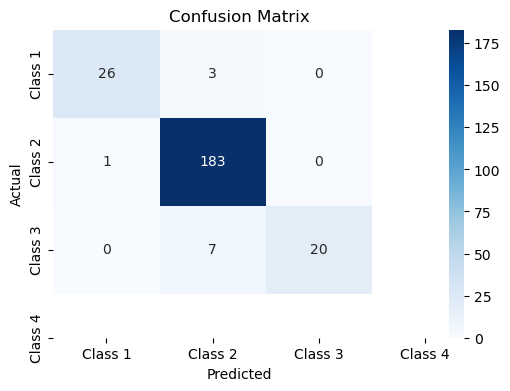

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix generate karna
cm = confusion_matrix(y_test, predictions)

# Heatmap Plot
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 1', 'Class 2', 'Class 3', 'Class 4'], yticklabels=['Class 1', 'Class 2', 'Class 3', 'Class 4'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


- our model is making highly accurate predictions. 
- Most of the time, it correctly identifies the right class, with only a few misclassifications. 
- These results show that our model is strong and reliable for decision-making

# INX Future Inc Employee Performance Analysis - Project Report

## 1. Business Problem Statement

INX Future Inc., a leading data analytics and automation company, has experienced a decline in employee performance, leading to an 8% drop in client satisfaction and an increase in service escalations. Management is concerned about taking direct action against low-performing employees as it may impact overall morale and the company’s reputation.

To address this challenge, the CEO, Mr. Brain, has initiated a data science project to analyze employee performance data. The goal is to uncover key factors influencing performance, identify underperforming employees accurately, and build a predictive model to assess employee performance based on relevant attributes. This will help management make informed hiring, retention, and training decisions to enhance overall efficiency.

## 2. Dataset Description

The dataset includes various attributes related to employee demographics, work experience, and performance metrics.
- **Employee ID** (Unique identifier, dropped as it does not contribute to predictions)
- **Target Variable**: Performance Rating 

##  Data Loading and Basic Checks

The dataset was loaded using Pandas, and initial checks were performed:
- Understanding the business problem of each feature.
- Checked missing values: No missing values were found, simplifying preprocessing.
- Checked duplicate values: No duplicate records were present.
- Checked data types: Ensured proper numerical and categorical formats.

## 4. Exploratory Data Analysis (EDA)

To understand data distribution and relationships, we conducted:
- **Univariate Analysis**: Histograms, count plots
- **Bivariate & Multivariate Analysis**: Pairplot, correlation heatmaps, an scatter plots.
- **Class Distribution Check**: Imbalanced data observed in performance rating classes.

## 5. Data Preprocessing

- **Handling Categorical Variables:** Applied Label Encoding for transformation.
- **Outlier Handling:** Used the IQR (Interquartile Range) method to cap extreme values without losing important data.
- **Skewness Correction:** Applied transformation techniques where needed to ensure normal distribution.
- **Feature Selection:**
  - Used a combination of correlation and domain knowledge.
  - Selected features with absolute correlation greater than 0.1.
  -  analysed features with absolute correlation greater than 0.1 also we analysed domain then we selected imp Features for this project.
    
- **Deciding Encoding:** Since categorical variables had  unique values, label encoding was preferred.

##  Data Splitting and Scaling

- **Train-Test Split:** Data was divided into 80% training and 20% testing sets.
- **Feature Scaling:** Used Standard Scaling to Normalize data

### Challenges Faced:
- **Ensuring Data Leakage Prevention:**Standard Scaling was applied to ensure that all numerical features had the same scale, leading to better model performance
## Model Selection and Evaluation

- Various classification models were trained and compared:
- After Checking various models training testing accuracy checked Both models have high testing accuracy (94.2% for Random Forest and 93.7% for Gradient Boosting), making them reliable.
- Random Forest has 100% training accuracy, meaning it overfits the data, while Gradient Boosting has 97.9%, showing better generalization 
-  Handles all classes well, with minor recall issues for class 4 than Random Forest
-  Gradient Boosting handles class imbalance better, making it a more reliable model for predictions.
- Works well with imbalanced classes and avoids overfitting.
- But We Selected Our Final Model After the Hypertunning Random Forest and Gradient Boosting
##  Hyperparameter Tuning (Final Model)

- Applied **GridSearchCV** to optimize Random Forest and Gradient Boosting models.
- **After Tuned Random Forest achieved best Accuracy with better recall.**

- we analyzed their performance using accuracy, precision, recall, F1-score, and confusion matrix.- 
Random Forest has Highest Accuracy (95.41%) than Gradient Boosting (94.16%).- **
It performs better in precision, recall, and F1-score, especially for Class 2 and Class **4- .
It makes fewer misclassifications in all categori
### Random Forest is selected as the best model for this project.cy.

 9. Model Deployment

- **Saved the Final Model using Pickle.**
- The model can now be used for future employee performance predictiong### Final ObservationsiWe checked the dataset containing employee details like age, salary, department, experience, education, and performance ratings.
we understand what kind of information we have and how it can help in predicting employee performance.oChecked how different factors like salary, experience, and work environment affect performance. Used visual graphs to compare performance across age groups, departments, and job roles.

## Found the top 3 factors affecting employee performance:
1. Work Environment Satisfaction (EmpEnvironmentSatisfaction)
Poor work environments can lead to decreased motivation and lower productivity levels.
we should focus on improving workplace conditions, ensuring a positive and engaging work culture.
2. Work-Life Balance (EmpWorkLifeBalance)
A poor work-life balance can lead to burnout, reduced efficiency, and lower engagement at work.
Recommendation: Implement flexible work policies, encourage regular breaks, and provide wellness programs to maintain a healthy work-life balance.
3 Salary Hike Percentage (EmpLastSalaryHikePercent)
Employees who received higher salary hikes maybe they have better performance ratings.
Recommendation: Implement a fair and performance-based salary hike structure to ensure employee motivation and retention.
## Recommendations
-Employees perform well when they are happy at work.
- If employees enjoy their work environment, they will be more productive.
- If they get fair salary hikes, they will stay motivated.
- If they have work-life balance, they will not feel stressed and will perform better..

